# Predicci√≥n de g√©neros musicales
## Miguel Bande, Octavian Rotita

In [84]:
# En primer lugar importamos las librer√≠as necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, MultiLabelBinarizer
import plotly.express as px
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import PIL.Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.utils import resample

# Cargamos el dataset:

Hemos cogido el codigo de https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset. Hemos cogido el dataset y lo hemos subido a github para que no se cambie el dataset cada vez que lo corramos.

In [23]:
df = pd.read_csv('./dataset.csv')
df.head(20)

Unnamed: 0                track_id                               artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9            9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
13          13  0X9MxHR1rTkEHDjp95F2OO                         Anna Hamilton   
14          14  4LbWtBkN82ZRhz9jqzgrb3              Chord Overstreet;Deepend   
15          15  1KHdq8NK9QxnGjdXb55NiG                           Landon Pigg   
16          16  6xKeQgzfjixSUld14qUezm                  Andrew Foy;Renee Foy   
17          17  4Yo0igmcoNyat1secaH0OD                  Andrew Foy;Renee Foy   
18          18  2qLMf6TuEC3ruGJg4SMMN6             Jason Mraz;Colbie Caillat   
19          19  6CgNoAbFJ4Q4Id4EjtbXlC               Boyce Avenue;Bea Miller   

                                           album_name  \
0                                              Comedy   
1                                    Ghost (Acoustic)   
2                                      To Begin Again   
3   Crazy Rich Asians (Original Motion Picture Sou...   
4                                             Hold On   
5                                Days I Will Remember   
6                         Is There Anybody Out There?   
7                 We Sing. We Dance. We Steal Things.   
8                 We Sing. We Dance. We Steal Things.   
9                                              Hunger   
10                                            Episode   
11                         Love Is a Four Letter Word   
12                                               Solo   
13                                           Bad Liar   
14                                    Hold On (Remix)   
15                                  The Boy Who Never   
16                              ily (i love you baby)   
17                                        At My Worst   
18                We Sing. We Dance. We Steal Things.   
19                             Cover Sessions, Vol. 4   

                          track_name  popularity  duration_ms  explicit  \
0                             Comedy          73       230666     False   
1                   Ghost - Acoustic          55       149610     False   
2                     To Begin Again          57       210826     False   
3         Can't Help Falling In Love          71       201933     False   
4                            Hold On          82       198853     False   
5               Days I Will Remember          58       214240     False   
6                      Say Something          74       229400     False   
7                          I'm Yours          80       242946     False   
8                              Lucky          74       189613     False   
9                             Hunger          56       205594     False   
10              Give Me Your Forever          74       244800     False   
11                   I Won't Give Up          69       240165     False   
12                              Solo          52       198712     False   
13                          Bad Liar          62       248448     False   


| Feature           | Description (English)                                                                                                                                                                                                                                                                                                           | Descripci√≥n (Espa√±ol)                                                                                                                                                                                                                                                                                                                                                        |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| track_id          | The Spotify ID for the track                                                                                                                                                                                                                                                                                                     | El ID de Spotify de la pista                                                                                                                                                                                                                                                                                                                                                  |
| artists           | The artists' names who performed the track. If there is more than one artist, they are separated by a ‚Äú;‚Äù                                                                                                                                                                                                                         | Los nombres de los artistas que interpretan la pista. Si hay m√°s de un artista, se separan con ‚Äú;‚Äù.                                                                                                                                                                                                                                                                           |
| album_name        | The album name in which the track appears                                                                                                                                                                                                                                                                                         | El nombre del √°lbum en el que aparece la pista                                                                                                                                                                                                                                                                                                                                |
| track_name        | Name of the track                                                                                                                                                                                                                                                                                                               | El nombre de la pista                                                                                                                                                                                                                                                                                                                                                         |
| popularity        | The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. | La popularidad de una pista es un valor entre 0 y 100, donde 100 es la m√°s popular. La popularidad se calcula mediante un algoritmo que se basa, principalmente, en el n√∫mero total de reproducciones que ha tenido la pista y cu√°n recientes sean dichas reproducciones. En t√©rminos generales, las canciones que se reproducen mucho ahora tendr√°n mayor popularidad que las que se reprodujeron mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma canci√≥n en un sencillo y en un √°lbum) se califican de forma independiente. La popularidad de un artista o √°lbum se deriva matem√°ticamente de la popularidad de sus pistas. |
| duration_ms       | The track length in milliseconds                                                                                                                                                                                                                                                                                                 | La duraci√≥n de la pista en milisegundos                                                                                                                                                                                                                                                                                                                                       |
| explicit          | Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)                                                                                                                                                                                                                             | Indica si la pista contiene letras expl√≠citas (true = s√≠, false = no o desconocido)                                                                                                                                                                                                                                                                                           |
| danceability      | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable                                                                                       | La bailabilidad describe cu√°n adecuada es una pista para bailar, bas√°ndose en una combinaci√≥n de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del comp√°s y la regularidad general. Un valor de 0.0 corresponde a la menor aptitud para bailar y 1.0 a la mayor.                                                                                   |
| energy            | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale                                                                                 | La energ√≠a es una medida que va de 0.0 a 1.0 y representa un valor perceptivo de intensidad y actividad. Por lo general, las pistas en√©rgicas se perciben como r√°pidas, potentes y estridentes. Por ejemplo, el death metal tiene una alta energ√≠a, mientras que un preludio de Bach punt√∫a bajo en la escala.                                                                  |
| key               | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C‚ôØ/D‚ô≠, 2 = D, and so on. If no key was detected, the value is -1                                                                                                                                                            | La tonalidad en la que se encuentra la pista. Los n√∫meros enteros se corresponden con notas utilizando la notaci√≥n est√°ndar de clase de tono (Pitch Class). Por ejemplo, 0 = Do, 1 = Do‚ôØ/Re‚ô≠, 2 = Re, etc. Si no se detecta tonalidad, el valor es -1.                                                                                   |
| loudness          | The overall loudness of a track in decibels (dB)                                                                                                                                                                                                                                                                                 | El nivel de volumen general de una pista en decibelios (dB)                                                                                                                                                                                                                                                                                                                  |
| mode              | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0                                                                                                                                                                   | El modo indica la modalidad (mayor o menor) de la pista, es decir, el tipo de escala de la que se deriva su contenido mel√≥dico. Mayor se representa con 1 y menor con 0.                                                                                                                                                                                                     |
| speechiness       | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks | Speechiness detecta la presencia de palabras habladas en una pista. Cuanto m√°s se acerque a 1.0, m√°s se asemeja a una grabaci√≥n de solo discurso (por ejemplo, un programa de radio, un audiolibro o poes√≠a). Valores por encima de 0.66 describen pistas que probablemente consisten enteramente en palabras habladas. Valores entre 0.33 y 0.66 describen pistas que pueden contener tanto m√∫sica como discurso (por ejemplo, m√∫sica rap). Valores por debajo de 0.33 representan con mayor probabilidad m√∫sica y otras grabaciones sin car√°cter hablado. |
| acousticness      | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic                                                                                                                                                                                                      | Una medida de confianza que va de 0.0 a 1.0 para determinar si la pista es ac√∫stica. 1.0 indica alta confianza de que la pista sea ac√∫stica                                                                                                                                                                                                                                  |
| instrumentalness  | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content                                                         | Predice si una pista no contiene voces. Los sonidos como "ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada se consideran claramente "vocales". Cuanto m√°s se acerque el valor de instrumentalness a 1.0, mayor es la probabilidad de que la pista no contenga voces.                                                        |
| liveness          | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live                                                                                                            | Detecta la presencia m√∫sica en vivo en la grabaci√≥n. Valores m√°s altos de liveness indican una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor por encima de 0.8 sugiere con fuerza que la pista es una grabaci√≥n en directo.                                                                                                                     |
| valence           | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)                                                                                | Una medida de 0.0 a 1.0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan m√°s alegres (por ejemplo, felices, animadas, euf√≥ricas), mientras que las pistas con valencia baja suenan m√°s negativas (por ejemplo, tristes, melanc√≥licas, enojadas).                                                                              |
| tempo             | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration                                                                                                                                        | El tempo estimado general de una pista en beats por minuto (BPM). En la terminolog√≠a musical, el tempo es la velocidad o el pulso de una pieza y se deriva directamente de la duraci√≥n promedio de cada pulso.                                                                                                                                                                 |
| time_signature    | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.                                                                                                     | Un comp√°s estimado. El comp√°s (o m√©trica) es una convenci√≥n notacional que especifica cu√°ntos pulsos hay en cada comp√°s. El valor puede variar de 3 a 7, representando compases de 3/4 hasta 7/4.                                                                                                                                                                           |
| track_genre       | The genre in which the track belongs                                                                                                                                                                                                                                                                                             | El g√©nero al que pertenece la pista                                                                                                                                                                                                                                                                                                                                             |


# Exploraci√≥n datos

In [24]:
# Dimensi√≥n del dataset
Shape = df.shape
print(f'Las entradas del dataset son: {Shape[0]} y las variables son: {Shape[1]}\n')

# Primeras filas
#print(df.head())

# Informaci√≥n b√°sica (tipos de datos y valores nulos)
print(df.info())

# Descripci√≥n estad√≠stica de las variables num√©ricas
#print(df.describe())


Las entradas del dataset son: 114000 y las variables son: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instru

In [25]:
numeric_features = df.select_dtypes(include=[np.number, bool]) 
# a√±adimos en numeric_features la columna 'track_id'


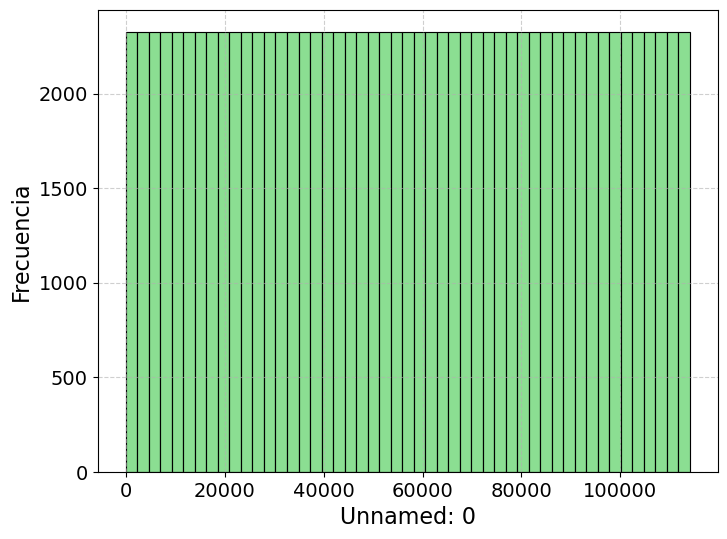

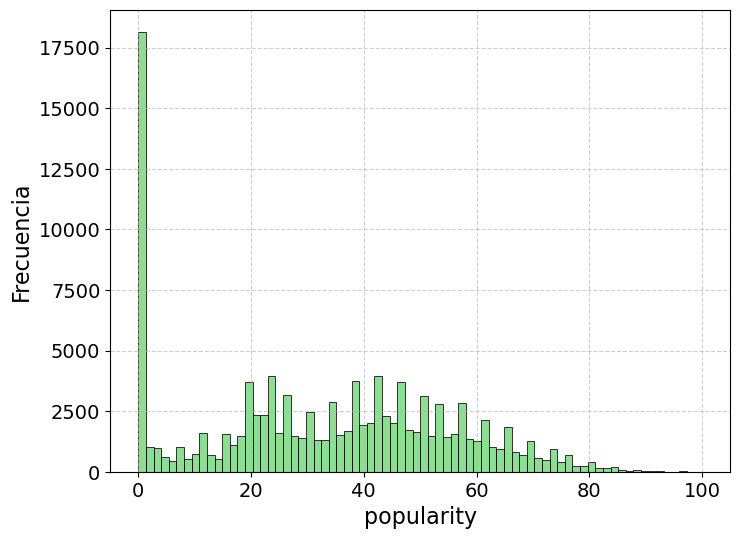

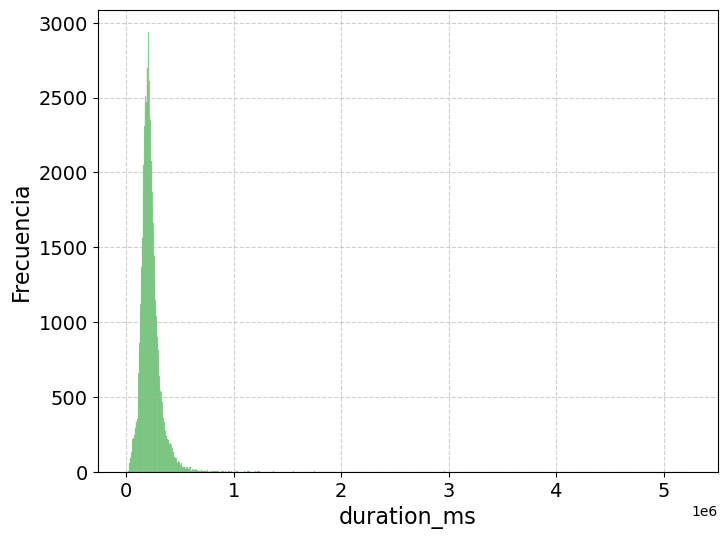

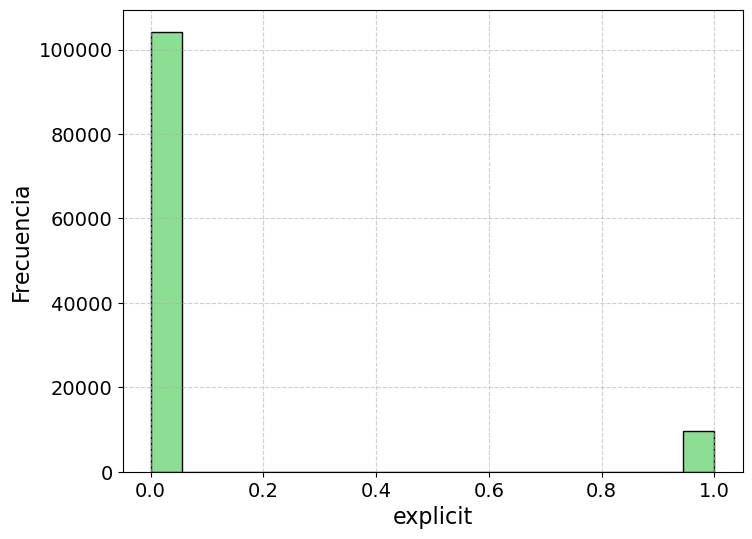

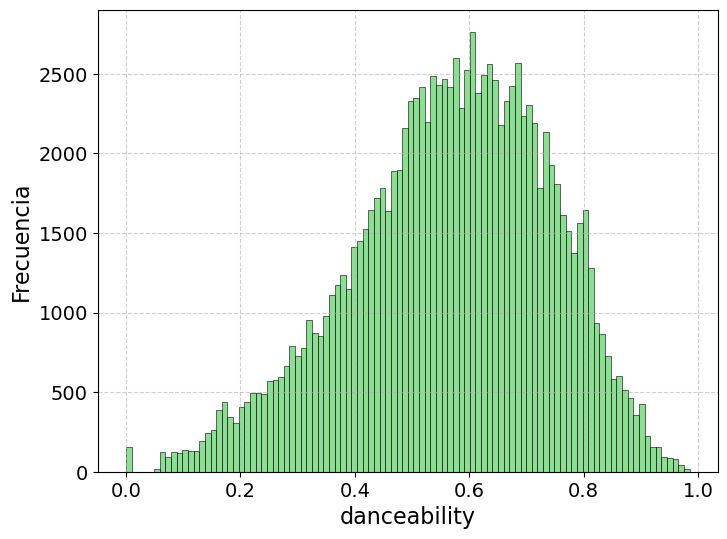

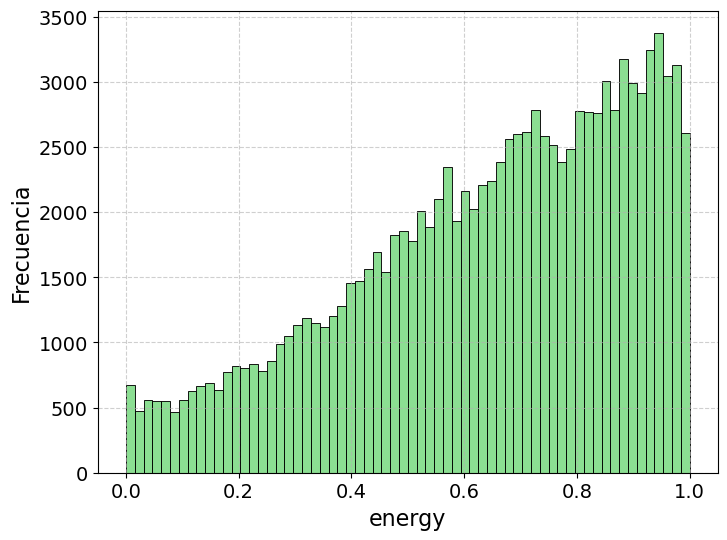

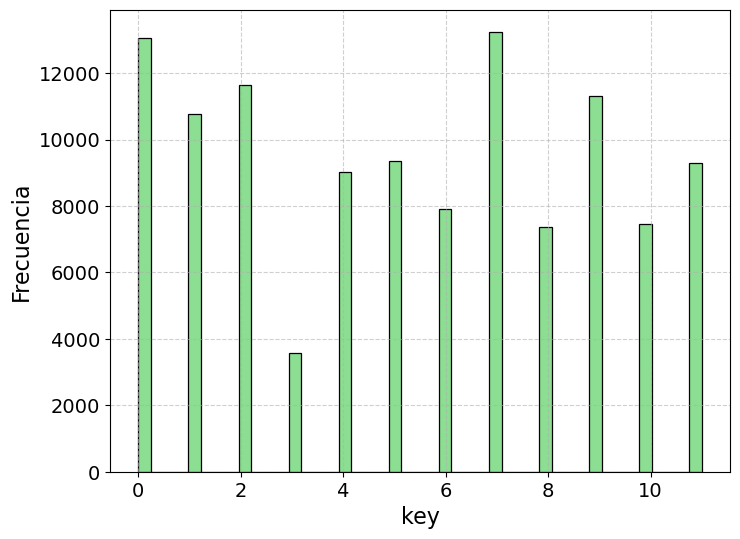

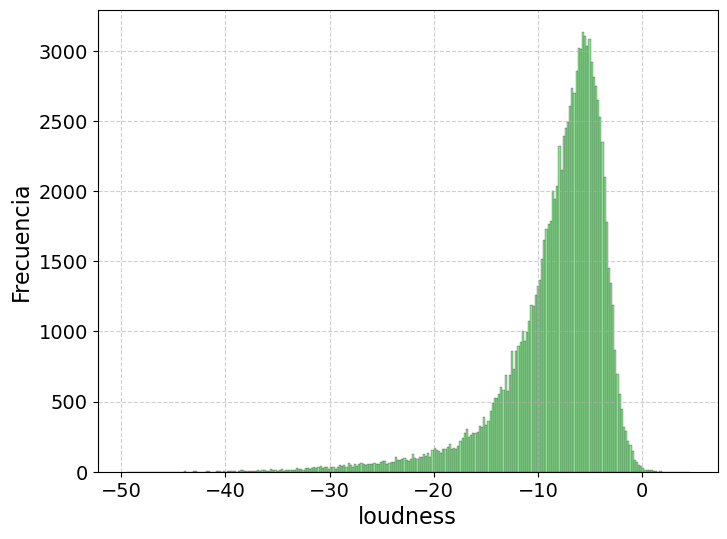

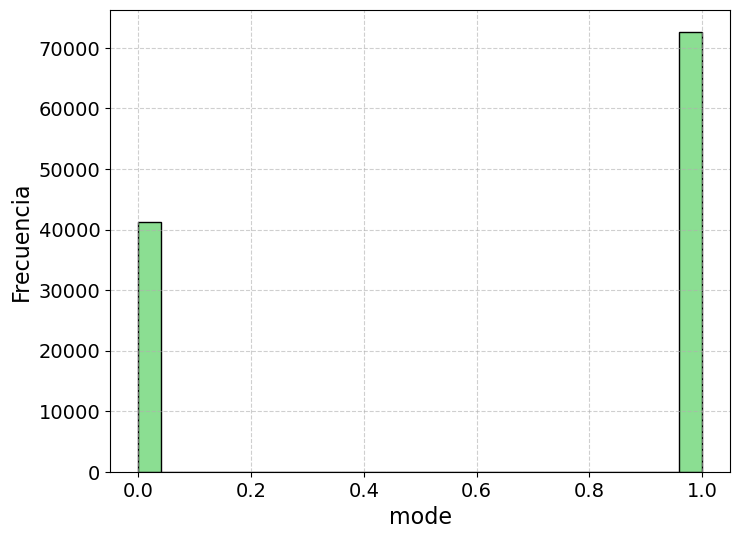

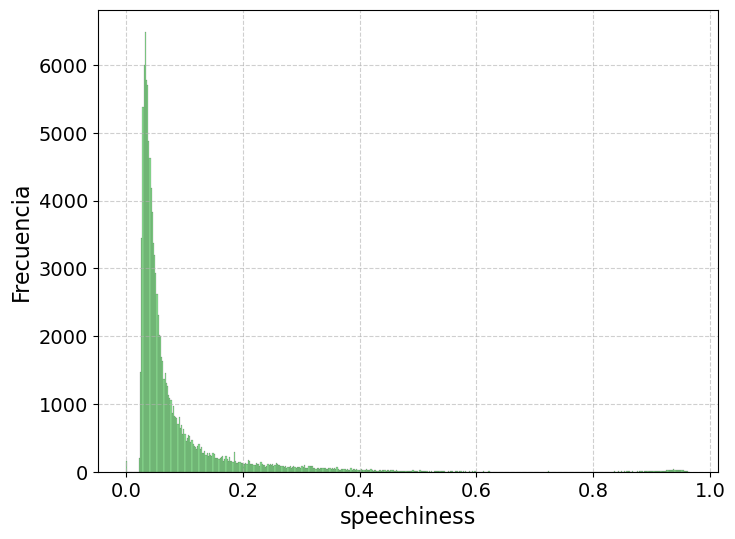

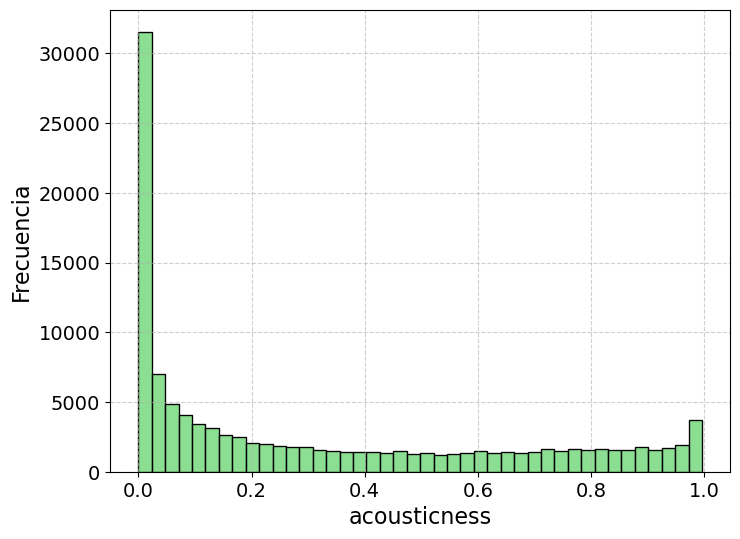

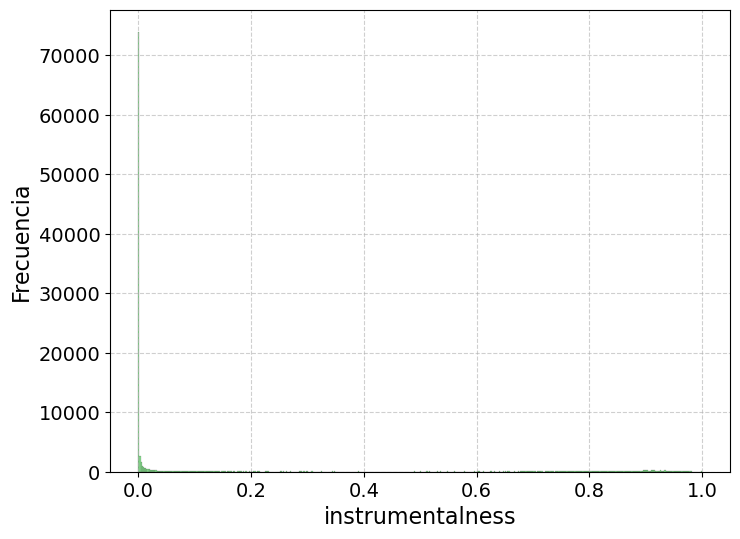

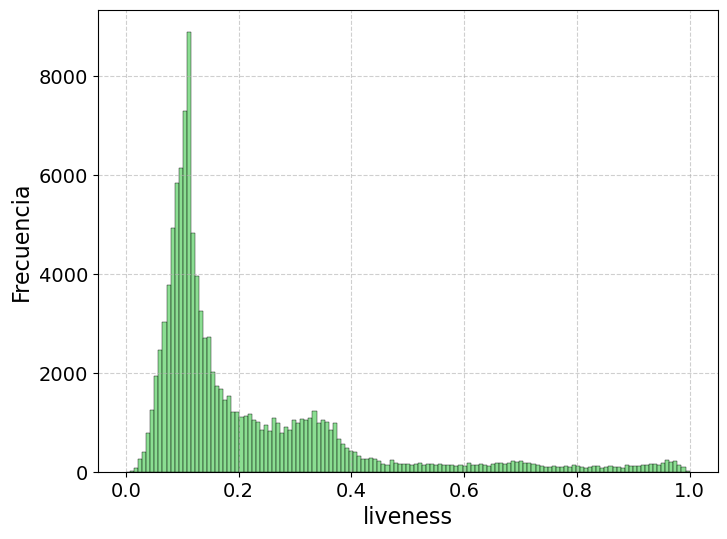

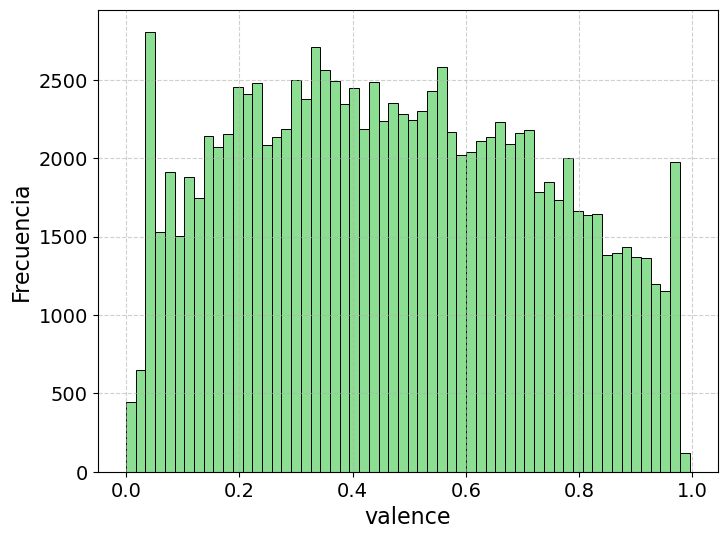

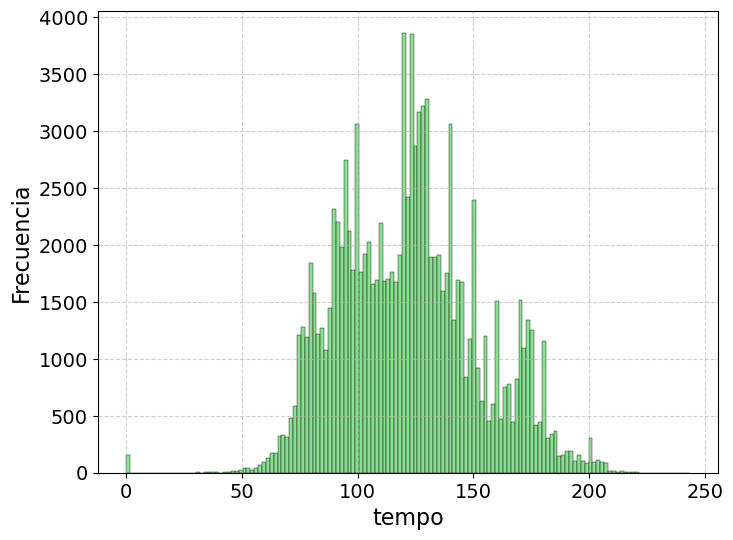

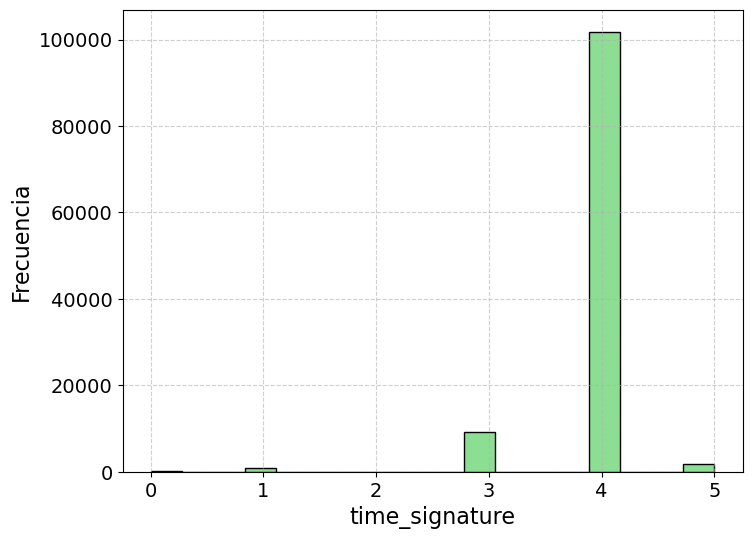

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar un dataset de ejemplo (puedes usar tu propio DataFrame)

# Configurar el tama√±o del texto
font_size = 16

# Crear histogramas con Matplotlib
for column in numeric_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=False, color=(101/255,212/255,110/255))  # Histograma con densidad
    
    # Personalizaci√≥n de los ejes y t√≠tulo
    plt.xlabel(column, fontsize=font_size)
    plt.ylabel('Frecuencia', fontsize=font_size)
    plt.xticks(fontsize=font_size - 2)
    plt.yticks(fontsize=font_size - 2)
    
    # Agregar una cuadr√≠cula para mejor visualizaci√≥n
    plt.grid(True, linestyle="--", alpha=0.6)

    # Guardar la figura como archivo de imagen
    file_name = f"histograma_{column}.png"
    plt.savefig(file_name, dpi=400, bbox_inches='tight')

    # Mostrar la figura
    plt.show()


Lo primero que nos llama la atenci√≥n en este dataset, es que hay un identificador de canciones, llamado `track_id`, el cual est√° repetido en diversas ocasiones en el dataset.



In [27]:
# Para ello vamos a hacer un groupby con el track_id y analizar qu√© es lo que pasa

df.groupby('track_id').count().sort_values(by='track_name', ascending=False).head(5).to_excel('top_tracks.xlsx')

In [28]:
df.groupby('track_id').count().groupby('track_name').count()

Unnamed: 0  artists  album_name  popularity  duration_ms  \
track_name                                                             
0                    1        1           1           1            1   
1                73099    73099       73099       73099        73099   
2                11712    11712       11712       11712        11712   
3                 2984     2984        2984        2984         2984   
4                 1372     1372        1372        1372         1372   
5                  431      431         431         431          431   
6                  117      117         117         117          117   
7                   22       22          22          22           22   
8                    2        2           2           2            2   
9                    1        1           1           1            1   

            explicit  danceability  energy    key  loudness   mode  \
track_name                                                           
0                  1             1       1      1         1      1   
1              73099         73099   73099  73099     73099  73099   
2              11712         11712   11712  11712     11712  11712   
3               2984          2984    2984   2984      2984   2984   
4               1372          1372    1372   1372      1372   1372   
5                431           431     431    431       431    431   
6                117           117     117    117       117    117   
7                 22            22      22     22        22     22   
8                  2             2       2      2         2      2   
9                  1             1       1      1         1      1   

            speechiness  acousticness  instrumentalness  liveness  valence  \
track_name                                                                   
0                     1             1                 1         1        1   
1                 73099         73099             73099     73099    73099   
2                 11712         11712             11712     11712    11712   
3                  2984          2984              2984      2984     2984   
4                  1372          1372              1372      1372     1372   
5                   431           431               431       431      431   
6                   117           117               117       117      117   
7                    22            22                22        22       22   
8                     2             2                 2         2        2   
9                     1             1                 1         1        1   

            tempo  time_signature  track_genre  
track_name                                      
0               1               1            1  
1           73099           73099        73099  
2           11712           11712        11712  
3            2984            2984         2984  
4            1372            1372         1372  
5             431             431          431  
6             117             117          117  
7              22              22           22  
8               2               2            2  
9               1               1            1

Podemos observar, que hay una misma canci√≥n con distintos tipos de g√©nero, tenemos que ver como manejamos posteriormente esta transformaci√≥n.

Agrupamos para cada `track_id` todos los g√©neros que aparecen para una misma canci√≥n en una lista.

In [29]:
# Quitar columnas innecesarias
df.drop(columns = ['Unnamed: 0'], inplace=True)
# Comprobar los valores de time_signature
df['time_signature'].value_counts()
# Quitar los valores que tienen 0 de time_signature
df = df[df['time_signature'] != 0]
# Quitar las canciones con duraci√≥n 0
df = df[df['duration_ms'] > 0]
df.describe().transpose()


count           mean            std          min  \
popularity        113836.0      33.233476      22.316549      0.00000   
duration_ms       113836.0  228109.608085  106308.371464  15800.00000   
danceability      113836.0       0.567590       0.172379      0.05130   
energy            113836.0       0.642112       0.250786      0.00002   
key               113836.0       5.309199       3.559429      0.00000   
loudness          113836.0      -8.239513       4.992758    -46.59100   
mode              113836.0       0.637496       0.480725      0.00000   
speechiness       113836.0       0.084770       0.105762      0.02210   
acousticness      113836.0       0.314642       0.332332      0.00000   
instrumentalness  113836.0       0.155362       0.308884      0.00000   
liveness          113836.0       0.213228       0.189932      0.00925   
valence           113836.0       0.474725       0.258841      0.00000   
tempo             113836.0     122.316220      29.653809     30.20000   
time_signature    113836.0       3.909624       0.406909      1.00000   

                          25%            50%          75%          max  
popularity            17.0000      34.000000      50.0000      100.000  
duration_ms       174198.0000  213000.000000  261587.0000  5237295.000  
danceability           0.4560       0.580000       0.6950        0.985  
energy                 0.4730       0.685000       0.8540        1.000  
key                    2.0000       5.000000       8.0000       11.000  
loudness             -10.0020      -6.998000      -5.0000        4.532  
mode                   0.0000       1.000000       1.0000        1.000  
speechiness            0.0359       0.048900       0.0846        0.965  
acousticness           0.0169       0.168000       0.5970        0.996  
instrumentalness       0.0000       0.000041       0.0477        1.000  
liveness               0.0980       0.132000       0.2730        1.000  
valence                0.2610       0.464000       0.6830        0.995  
tempo                 99.4305     122.023000     140.0780      243.372  
time_signature         4.0000       4.000000       4.0000        5.000

### Conversi√≥n de db a W

In [30]:
def convertir_a_decibelios(sonido):
    return 10**(-12) * 10**((sonido)/10)

df['loudness'] = df['loudness'].apply(convertir_a_decibelios)

## Relaci√≥n entre danzabilidad y g√©nero

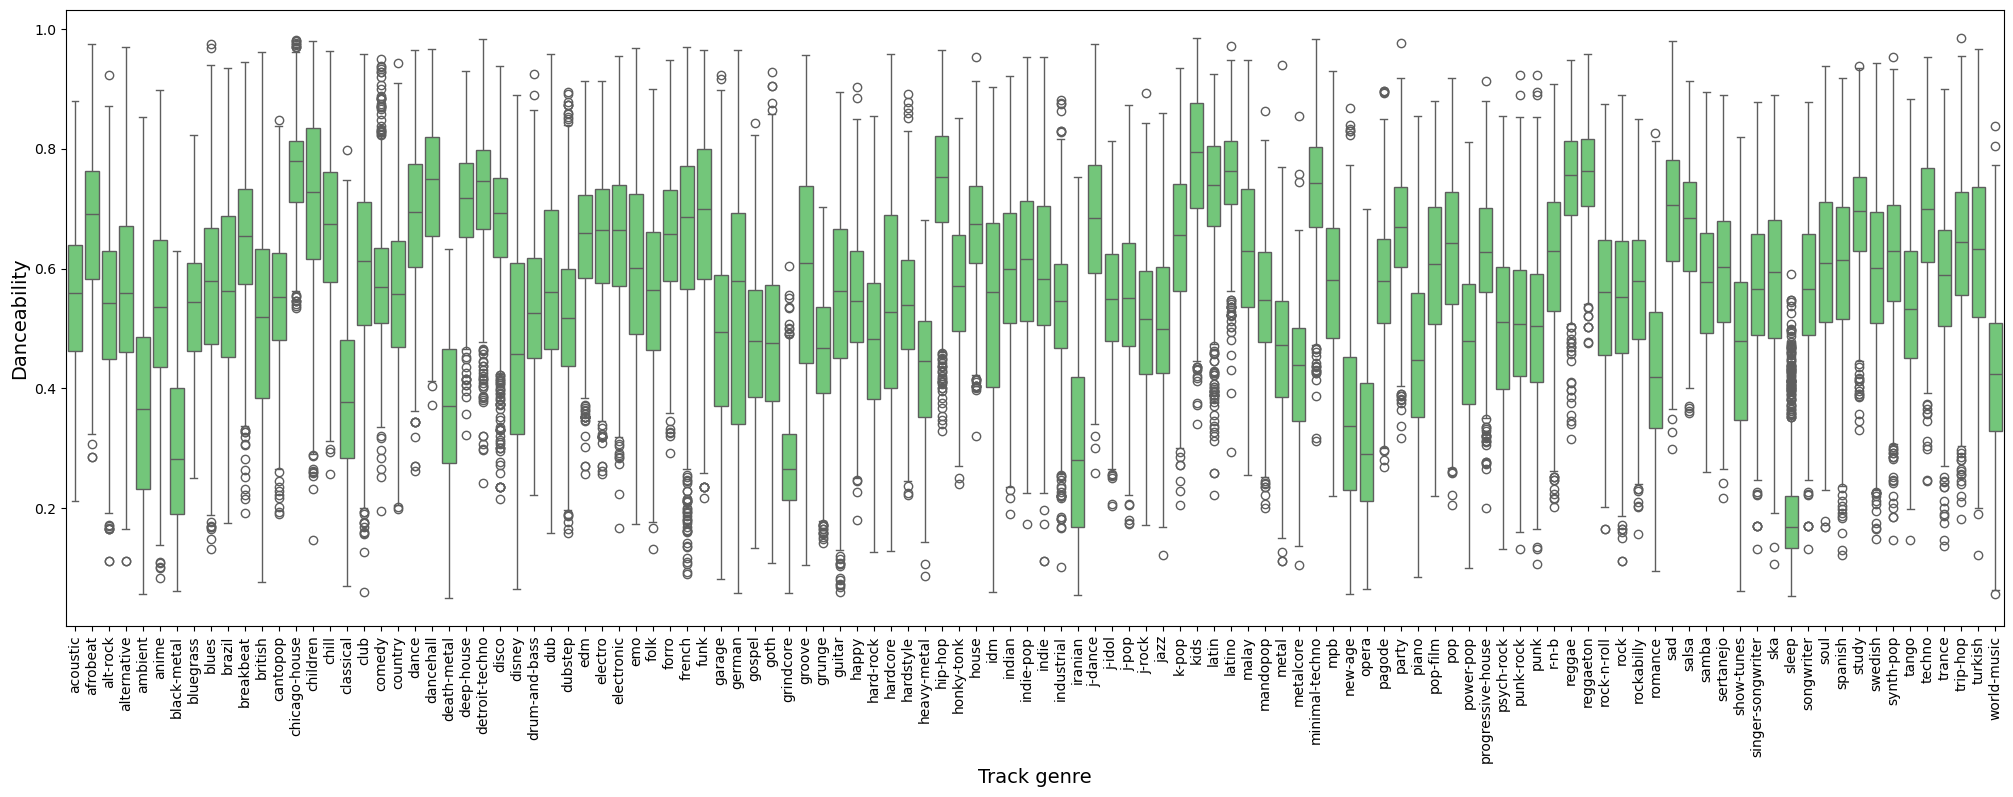

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))
sns.boxplot(x='track_genre', y='danceability', data=df, color=(101/255,212/255,110/255))
plt.xlabel('Track genre', fontsize = 14)
plt.ylabel('Danceability', fontsize = 14)
plt.xticks(rotation=90)
plt.savefig('danceability_genre.png', dpi = 500, bbox_inches = 'tight')
plt.show()


## Relaci√≥n entre energ√≠a y loudness

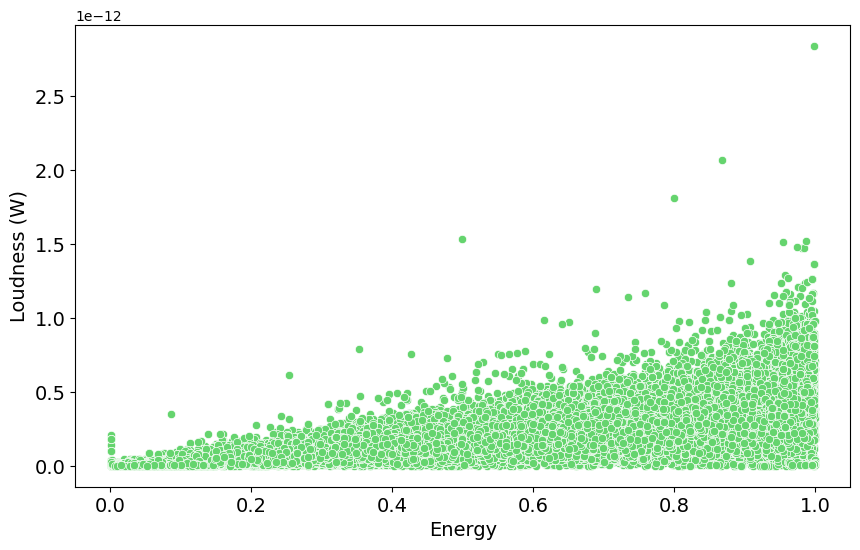

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='loudness', data=df, color=(101/255,212/255,110/255))
#plt.title('Energy vs Loudness')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Loudness (W)', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('energy_vs_loudness_W.png', dpi=300, bbox_inches='tight')
plt.show()

## Matriz de correlaciones

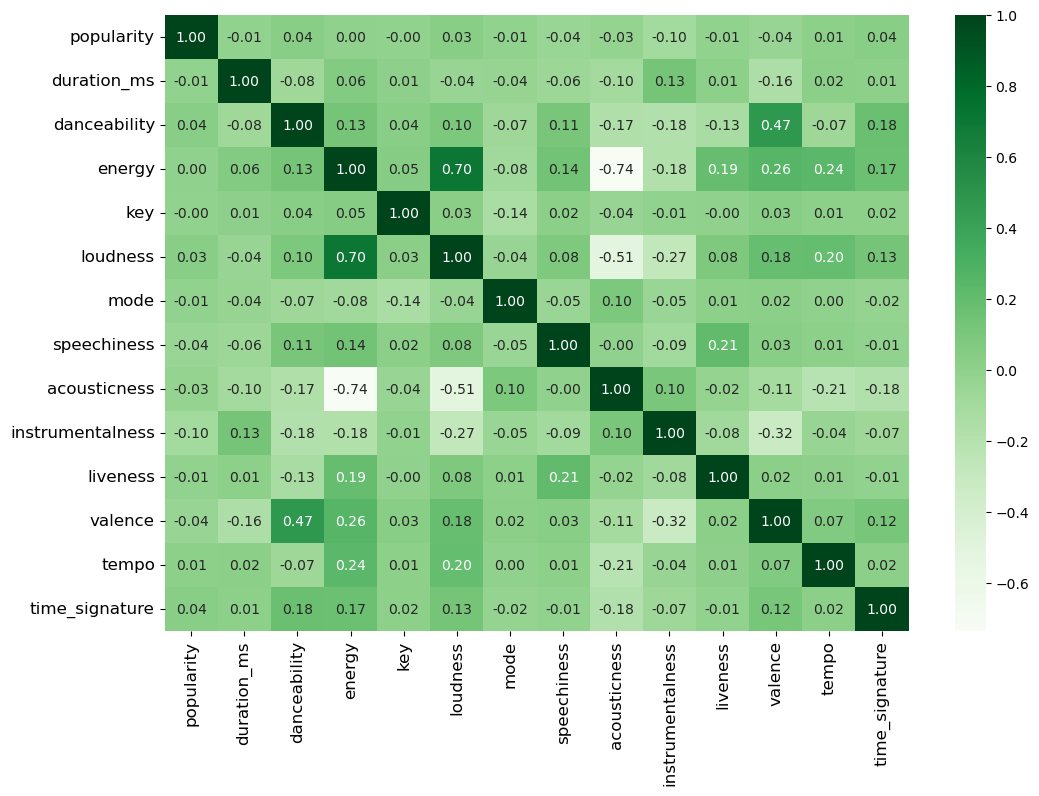

In [33]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features, annot=True, cmap='Greens', fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Resoluci√≥n problema multiclase

Empezamos reduciendo la dimensionalidad del problema reduciendo la muestra √∫nicamente a aquellas canciones que est√°n clasificadas √∫nicamente en un g√©nero, para tener una idea de c√≥mo abordar el problema m√°s f√°cilmente 

In [34]:
# Diccionario de agrupaci√≥n manual
genre_mapping = {
    # üé∏ Rock y derivados
    "hard-rock": "rock",
    "rock": "rock",
    "rock-n-roll": "rock",
    "alt-rock": "rock",
    "garage": "rock",
    "grunge": "rock",
    "psych-rock": "rock",
    "punk-rock": "rock",
    "punk": "rock",
    "hardcore": "rock",
    "indie-rock": "rock",
    
    # ü§ò Metal y variantes
    "heavy-metal": "metal",
    "black-metal": "metal",
    "death-metal": "metal",
    "metal": "metal",
    "metalcore": "metal",
    "grindcore": "metal",
    "groove": "metal",
    
    # üéß Electr√≥nica y variantes
    "edm": "electronic",
    "electro": "electronic",
    "electronic": "electronic",
    "synth-pop": "electronic",
    "dubstep": "electronic",
    "techno": "electronic",
    "minimal-techno": "electronic",
    "detroit-techno": "electronic",
    "house": "electronic",
    "deep-house": "electronic",
    "progressive-house": "electronic",
    "trance": "electronic",
    "drum-and-bass": "electronic",
    "idm": "electronic",
    "breakbeat": "electronic",
    "club": "electronic",
    
    # üé§ Hip-Hop / R&B
    "hip-hop": "hip-hop_rnb",
    "r-n-b": "hip-hop_rnb",
    
    # üéº Pop y variantes
    "pop": "pop",
    "indie-pop": "pop",
    "british": "pop",
    "power-pop": "pop",
    "mandopop": "pop",
    "cantopop": "pop",
    "j-pop": "pop",
    "k-pop": "pop",
    
    # üåé M√∫sica Latina y Tropical
    "latin": "latin",
    "latino": "latin",
    "brazil": "latin",
    "mpb": "latin",
    "pagode": "latin",
    "samba": "latin",
    "forro": "latin",
    "sertanejo": "latin",
    "tango": "latin",
    "salsa": "latin",
    "reggaeton": "latin",
    
    # üé∂ M√∫sica cl√°sica y ambiental
    "classical": "classical",
    "piano": "classical",
    "opera": "classical",
    "ambient": "classical",
    
    # üé∑ Jazz, Soul, Blues
    "jazz": "jazz_soul",
    "soul": "jazz_soul",
    "blues": "jazz_soul",
    
    # üé∂ Folk y cantautores
    "folk": "folk_songwriter",
    "songwriter": "folk_songwriter",
    "singer-songwriter": "folk_songwriter",
    
    # üéµ M√∫sica alternativa y experimental
    "alternative": "alternative",
    "indie": "alternative",
    "emo": "alternative",
    "goth": "alternative",
    
    # üè† M√∫sica de hogar y relajaci√≥n
    "chill": "chill_sleep",
    "sleep": "chill_sleep",
    "study": "chill_sleep",
    
    # üé≠ Bandas sonoras y m√∫sica de cine
    "disney": "soundtrack",
    "pop-film": "soundtrack",
    "show-tunes": "soundtrack",
    
    # üï∫ Funk, Disco y Groove
    "funk": "funk_disco",
    "disco": "funk_disco",
    "groove": "funk_disco",
    
    # üéπ M√∫sica instrumental y guitarra
    "acoustic": "instrumental",
    "guitar": "instrumental",
    
    # üåç M√∫sica del mundo
    "world-music": "world",
    "turkish": "world",
    "iranian": "world",
    "afrobeat": "world",
    "indian": "world",
    "malay": "world",
    "gospel": "world",
    
    # üé° M√∫sica infantil
    "children": "children",
    "kids": "children",
    
    # üéµ Otros g√©neros
    "comedy": "comedy",
    "party": "party",
    "happy": "party",
    "honky-tonk": "country",
    "country": "country",
    "industrial": "industrial",
    "new-age": "new-age",
    "dub": "dub",
    "dance": "dancehall",
    "dancehall": "dancehall",
    "ska": "ska",
    "trip-hop": "trip-hop",
    "romance": "romance",
    "sad": "romance",
    
    # Incluidos en version 2
    "anime": "soundtrack",  # M√∫sica relacionada con anime, similar a bandas sonoras
    "bluegrass": "folk_songwriter",  # Subg√©nero del folk con ra√≠ces en EE.UU.
    "chicago-house": "electronic",  # Subg√©nero del house, dentro de electr√≥nica
    "french": "world",  # M√∫sica francesa, dentro de m√∫sica del mundo
    "german": "world",  # M√∫sica alemana, dentro de m√∫sica del mundo
    "hardstyle": "electronic",  # Subg√©nero de electr√≥nica, similar a techno y trance
    "j-dance": "pop",  # Subg√©nero japon√©s relacionado con pop y dance
    "j-idol": "pop",  # M√∫sica idol japonesa, en pop
    "j-rock": "rock",  # Rock japon√©s, dentro de rock
    "reggae": "world",  # Reggae dentro de m√∫sica del mundo
    "rockabilly": "rock",  # Subg√©nero de rock & roll
    "spanish": "world",  # M√∫sica en espa√±ol dentro de m√∫sica del mundo
    "swedish": "world",  # M√∫sica sueca dentro de m√∫sica del mundo
    
}

df_single_genre = df.copy()
# Funci√≥n para mapear cada g√©nero dentro de la lista
def map_genres(genre_list):
    if isinstance(genre_list, (list, tuple)):  # Si es una lista o tupla
        return [genre_mapping.get(genre, genre) for genre in genre_list]  # Mapea cada elemento
    return genre_mapping.get(genre_list, genre_list)  # Si es un string, mapear directamente

# Aplicar la funci√≥n a la columna
df_single_genre["track_genre"] = df_single_genre["track_genre"].apply(map_genres)


In [35]:
df_single_genre = df_single_genre.groupby(['track_id', 'track_name'])['track_genre'].apply(lambda x: list(set(x))).reset_index().\
    merge(df, on='track_id', how='left').drop_duplicates(subset='track_id').\
    drop(columns=['track_genre_y', 'track_name_y']).rename(columns={'track_name_x': 'track_name', 'track_genre_x': 'track_genre'})

In [36]:
# Nos quedamos √∫nicamente con aquellas canciones que tienen un solo g√©nero
df_single_genre = df_single_genre[df_single_genre['track_genre'].apply(lambda x: len(x) == 1)]

In [37]:
# üîπ Convertir la columna a strings, eliminando caracteres innecesarios
df_single_genre['track_genre'] = df_single_genre.apply(lambda x: x['track_genre'][0], axis=1)
# üìå Contar cu√°ntas canciones hay en cada g√©nero
genre_counts = df_single_genre['track_genre'].value_counts()

# üìå Filtrar solo los g√©neros que tienen al menos 900 canciones
filtered_genres = genre_counts[genre_counts >= 900]

# üìå Obtener el m√≠nimo n√∫mero de canciones en estos g√©neros
n_min_genre = filtered_genres.min()

# üìå Aplicar undersampling solo a los g√©neros que cumplen la condici√≥n
df_balanced = df_single_genre[df_single_genre['track_genre'].isin(filtered_genres.index)]\
    .groupby('track_genre', group_keys=False)\
    .apply(lambda x: x.sample(n=n_min_genre, random_state=42))\
    .reset_index(drop=True)

print("‚úÖ Dataset balanceado correctamente con", df_balanced.shape[0], "filas")


‚úÖ Dataset balanceado correctamente con 19888 filas


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3168279288.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=n_min_genre, random_state=42))\


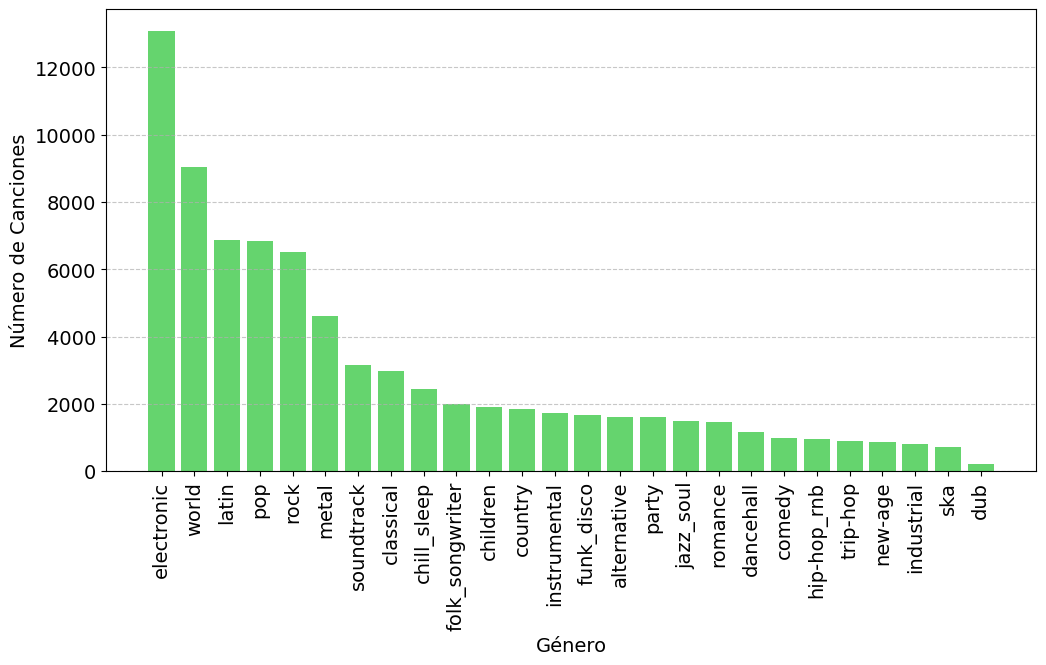

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que los g√©neros sean strings en lugar de tuplas
df_single_genre['track_genre'] = df_single_genre['track_genre'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Contar el n√∫mero de canciones por g√©nero
genre_counts = df_single_genre['track_genre'].value_counts()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color = (101/255,212/255,110/255))

# Personalizar el gr√°fico
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("G√©nero", fontsize = 14)
plt.ylabel("N√∫mero de Canciones", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('histograma_generos.png', dpi=300, bbox_inches='tight')
# Mostrar el gr√°fico
plt.show()

### Binarizaci√≥n de g√©neros 

In [39]:
from sklearn.preprocessing import OneHotEncoder

df_balanced['track_genre'] = df_balanced['track_genre'].astype(str).str.strip("(),'") # Convertir a string las tuplas de genero
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(df_balanced[['track_genre']])
print("Dimensiones de y:", y.shape)

Dimensiones de y: (19888, 22)


### Selecci√≥n de variables predictoras

In [40]:
# One-hot encoding de la variable time_signature, solo nos vamos a quedar con 3 y 4 porque son los m√°s significantes
df_balanced = pd.concat([df_balanced, pd.get_dummies(df_balanced['time_signature'])], axis=1) 
df_balanced.drop(columns=['time_signature', 1,5], inplace = True)
df_balanced.rename(columns={3: 'time_signature_3', 4: 'time_signature_4'}, inplace=True)

In [41]:
features = [
    'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'time_signature_3', 'time_signature_4', 'mode', 'duration_ms',
    'key', 'loudness', 'acousticness', 'popularity'
]

X = df_balanced[features].copy()

# Opcional: llenar posibles nulos
imputer = SimpleImputer(strategy='mean')  # o la estrategia que estimes
X = imputer.fit_transform(X)

# Escalado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = scaler.fit_transform(X)


### Divisi√≥n train-test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)


### Entrenamiento Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# üìå Definir Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

# Entrenamiento
rf_model.fit(X_train, y_train.argmax(axis=1))  # Usamos .argmax() porque es multiclase

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluaci√≥n
print("üìä Classification Report - Random Forest:")
print(classification_report(y_test.argmax(axis=1), y_pred_rf))

f1_micro_rf = f1_score(y_test.argmax(axis=1), y_pred_rf, average='micro')
f1_macro_rf = f1_score(y_test.argmax(axis=1), y_pred_rf, average='macro')

print("F1-micro (RF):", f1_micro_rf)
print("F1-macro (RF):", f1_macro_rf)


üìä Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.28      0.19      0.23       151
           1       0.63      0.72      0.67       173
           2       0.75      0.74      0.75       191
           3       0.61      0.63      0.62       189
           4       0.93      0.86      0.89       187
           5       0.66      0.72      0.69       175
           6       0.49      0.67      0.57       174
           7       0.49      0.39      0.43       179
           8       0.43      0.39      0.41       190
           9       0.49      0.40      0.44       198
          10       0.53      0.64      0.58       182
          11       0.35      0.49      0.41       168
          12       0.75      0.51      0.61       182
          13       0.55      0.67      0.60       193
          14       0.63      0.79      0.70       179
          15       0.60      0.77      0.68       173
          16       0.42      0.22    

In [44]:
import pandas as pd
from sklearn.metrics import classification_report

# üìå Obtener el reporte de clasificaci√≥n como diccionario
report_dict = classification_report(y_test.argmax(axis=1), y_pred_rf, target_names=ohe.categories_[0], output_dict=True)

# üìå Convertir el diccionario en DataFrame
df_report = pd.DataFrame(report_dict).transpose()

# üìå Guardar en un archivo Excel
df_report.to_excel('classification_report.xlsx')

print("‚úÖ Reporte de clasificaci√≥n guardado como 'classification_report.xlsx'")


‚úÖ Reporte de clasificaci√≥n guardado como 'classification_report.xlsx'


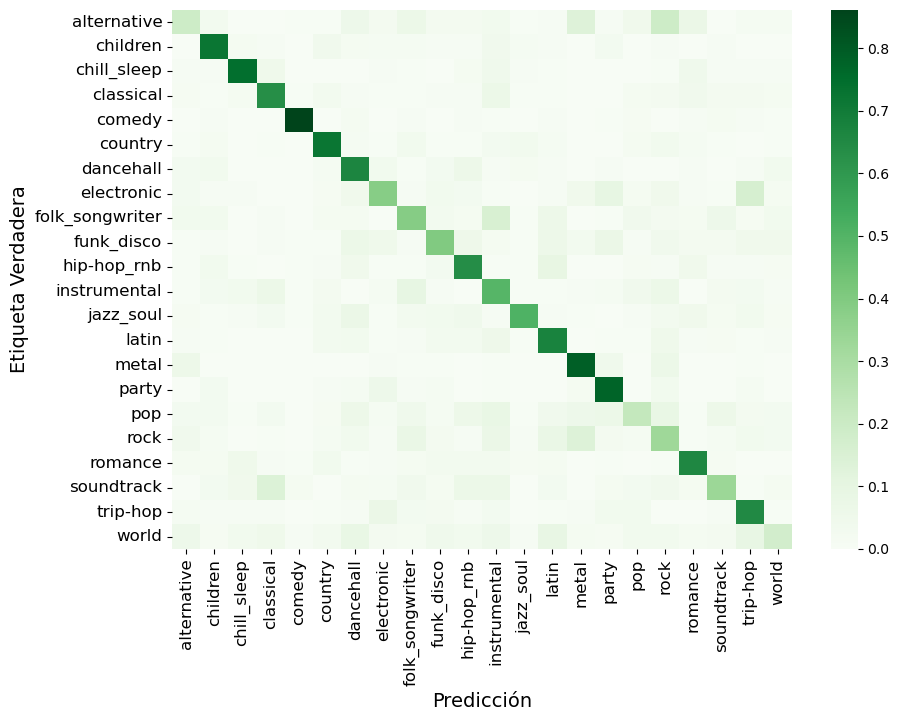

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# üìå Obtener la matriz de confusi√≥n
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_rf)  # Ajusta seg√∫n el modelo que quieras visualizar

# üìå Normalizar la matriz (opcional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# üìå Definir etiquetas
labels = ohe.categories_[0]  # Si usaste OneHotEncoder
# üìå Plot de la matriz de confusi√≥n
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=False, cmap="Greens", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicci√≥n", fontsize=14)
plt.ylabel("Etiqueta Verdadera", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('matriz_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

## Red Neuronal

In [46]:
X = df_balanced[features].copy()

# Escalado para no saturar funci√≥n de activaci√≥n
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)


# ------------------------------------------------------------------
# 4. Definici√≥n de la red neuronal Keras
# ------------------------------------------------------------------
# Par√°metros
n_features = X_train.shape[1]
n_labels = y_train.shape[1]

# Definir la red neuronal
model = models.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(256, activation='relu'),  # M√°s neuronas para mayor capacidad
    layers.Dropout(0.4),  # Dropout para evitar sobreajuste
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(n_labels, activation='softmax')  # Softmax para clasificaci√≥n multiclase
])

# Compilaci√≥n del modelo
model.compile(
    loss='categorical_crossentropy',  # P√©rdida para multiclase
    optimizer='adam',
    metrics=['accuracy']  # Accuracy es adecuada para multiclase
)

model.summary()

# ------------------------------------------------------------------
# 5. Entrenamiento
# ------------------------------------------------------------------
# Callbacks para un mejor manejo del entrenamiento

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Detener si no mejora
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)  # Reducir el learning rate din√°micamente
]

history = model.fit(
    X_train, 
    y_train, 
    epochs=60,         # M√°s √©pocas con EarlyStopping
    batch_size=16,     # Ajusta seg√∫n tus datos
    validation_data=(X_test, y_test),
    callbacks=callbacks,  # Agregar callbacks para mejorar el entrenamiento
    verbose=1
)

# ------------------------------------------------------------------
# 6. Evaluaci√≥n con m√©tricas detalladas
# ------------------------------------------------------------------
# Generar predicciones
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)  # Obtener las clases predichas (√≠ndice de mayor probabilidad)
y_true = y_test.argmax(axis=1)  # Convertir one-hot encoding a clases originales

# M√©tricas detalladas
print("\nüìä Classification Report:")
print(classification_report(y_true, y_pred, target_names=ohe.categories_[0]))

# M√©tricas globales
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')

print("\nüîπ M√©tricas Globales:")
print(f"F1-micro: {f1_micro:.4f}")
print(f"F1-macro: {f1_macro:.4f}")
print(f"Precision-macro: {precision_macro:.4f}")
print(f"Recall-macro: {recall_macro:.4f}")


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 256)            ‚îÇ         4,096 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 22)             ‚îÇ         1,430 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 46,678 (182.34 KB)

 Trainable params: 46,678 (182.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
995/995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 975us/step - accuracy: 0.1625 - loss: 2.7602 - val_accuracy: 0.3338 - val_loss: 2.2136 - learning_rate: 0.0010
Epoch 2/60
995/995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 925us/step - accuracy: 0.2979 - loss: 2.3032 - val_accuracy: 0.3622 - val_loss: 2.0914 - learning_rate: 0.0010
Epoch 3/60
995/995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 855us/step - accuracy: 0.3266 - loss: 2.2073 - val_accuracy: 0.3786 - val_loss: 2.0286 - learning_rate: 0.0010
Epoch 4/60
995/995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 877us/step - accuracy: 0.3413 - loss: 2.1741 - val_accuracy: 0.3844 - val_loss: 1.9984 - learning_rate: 0.0010
Epoch 5/60
995/995 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 913us/step - accuracy: 0.3581 - loss: 2.1285 - val_accuracy: 0.3947 - val_loss: 1.9695 - learning_rate: 0.0010
Epoch 6/60
995/995 ‚îÅ‚îÅ‚îÅ‚î

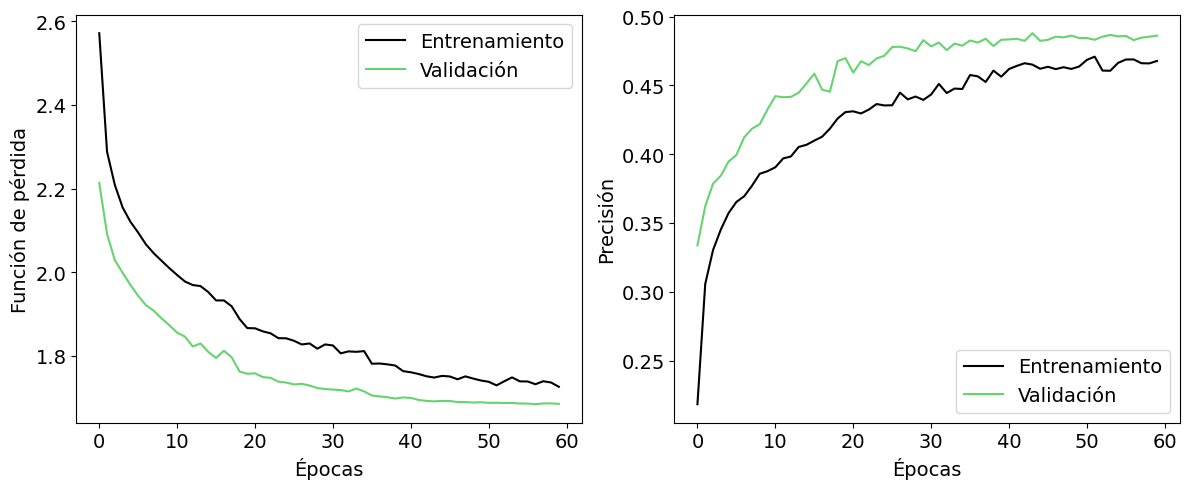

In [47]:
# Graficar p√©rdida y precisi√≥n
plt.figure(figsize=(12, 5))

# P√©rdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento', color = 'black')
plt.plot(history.history['val_loss'], label='Validaci√≥n', color = (101/255,212/255,110/255))
#plt.title('P√©rdida durante el entrenamiento')
plt.xlabel('√âpocas', fontsize = 14)
plt.ylabel('Funci√≥n de p√©rdida', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)

# Precisi√≥n
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento',  color = 'black')
plt.plot(history.history['val_accuracy'], label='Validaci√≥n', color = (101/255,212/255,110/255))
#plt.title('Precisi√≥n durante el entrenamiento')
plt.xlabel('√âpocas', fontsize = 14)
plt.ylabel('Precisi√≥n', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)

plt.tight_layout()
plt.savefig('entrenamiento_validacion_red_neuronal.png', dpi=500, bbox_inches='tight')
plt.show()


In [48]:
import pandas as pd
from sklearn.metrics import classification_report

# üìå Obtener el reporte de clasificaci√≥n como diccionario
report_dict = classification_report(y_test.argmax(axis=1), y_pred, target_names=ohe.categories_[0], output_dict=True)

# üìå Convertir el diccionario en DataFrame
df_report = pd.DataFrame(report_dict).transpose()

# üìå Guardar en un archivo Excel
df_report.to_excel('red_neuronal_mutliclase_classification_report.xlsx')

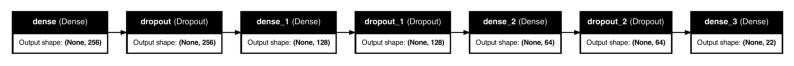

In [49]:
# Guardar el esquema de la red neuronal en un archivo
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True, rankdir="LR")

# Mostrar la imagen generada
img = PIL.Image.open("model_architecture.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


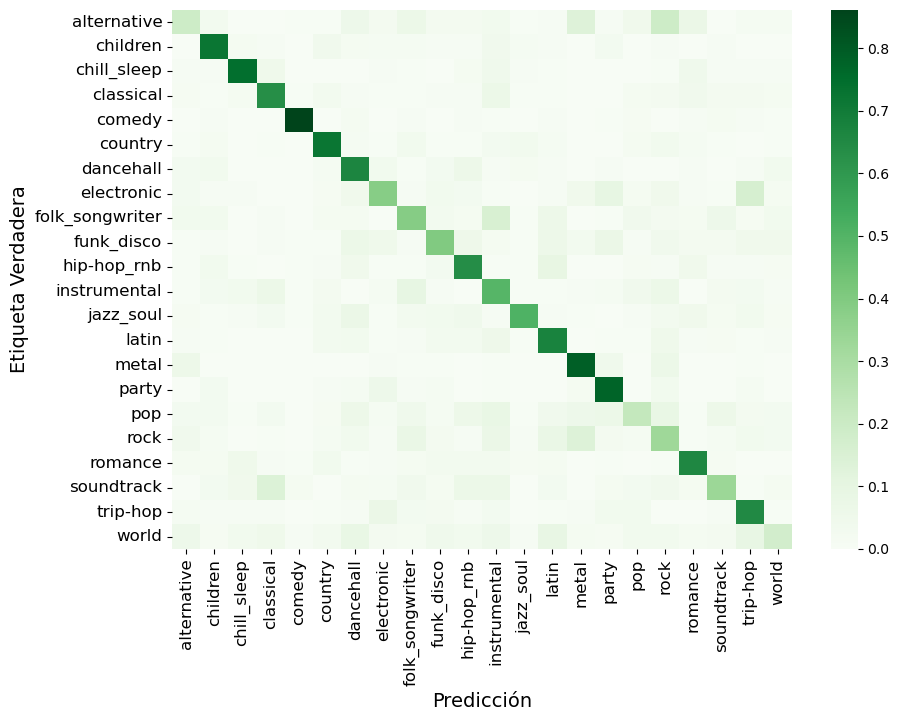

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# üìå Obtener la matriz de confusi√≥n
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_rf)  # Ajusta seg√∫n el modelo que quieras visualizar

# üìå Normalizar la matriz (opcional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# üìå Definir etiquetas
labels = ohe.categories_[0]  # Si usaste OneHotEncoder
# üìå Plot de la matriz de confusi√≥n
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=False, cmap="Greens", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicci√≥n", fontsize=14)
plt.ylabel("Etiqueta Verdadera", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('matriz_confusion_red_neuronal_multiclase.png', dpi=300, bbox_inches='tight')
plt.show()

## PCA y Cl√∫ster

In [51]:
df_single_genre['track_genre'] = df_single_genre['track_genre'].astype(str).str.strip("(),'") # Convertir a string las tuplas de genero
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(df_single_genre[['track_genre']])
print("Dimensiones de y:", y.shape)

Dimensiones de y: (77500, 26)


In [52]:
features = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'mode', 'duration_ms', 'key', 'loudness', 'acousticness', 'popularity']
X = df_single_genre[features].copy()

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)


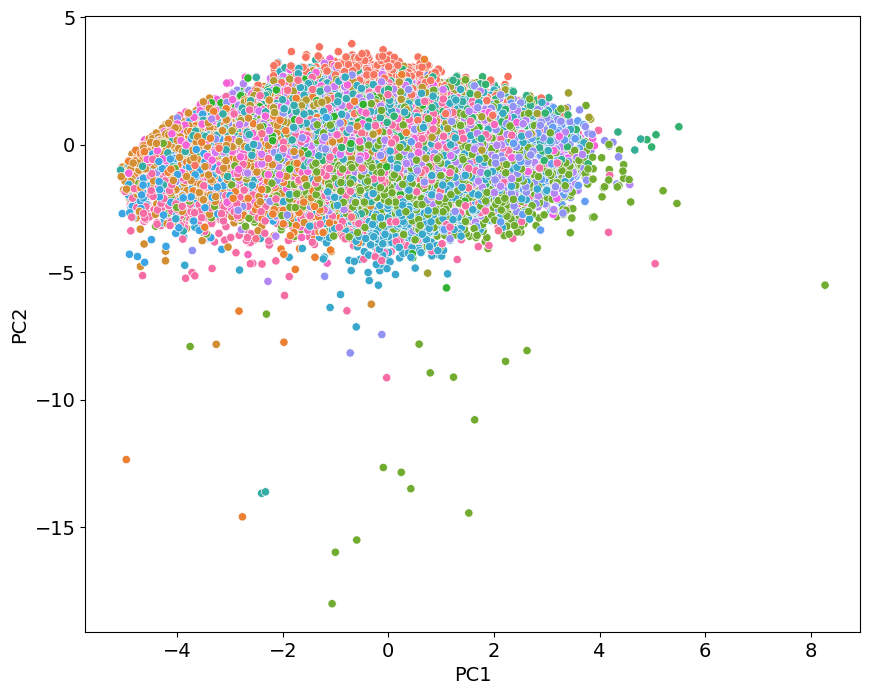

In [53]:
palette = sns.color_palette("husl", n_colors=26)  # 25 colores distintos
# üìå Aplicamos PCA para reducir a 2 dimensiones (para visualizaci√≥n)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# üìå Convertimos a un DataFrame para analizar
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["genre"] = y_train.argmax(axis=1)  # Asignamos los g√©neros originales

# üìå Visualizamos los g√©neros en el espacio PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=pca_df["genre"], palette=palette, alpha=1, legend = False)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('pca_generos.png', dpi=300, bbox_inches='tight')
plt.show()


In [54]:
num_clusters = 20  # üìå Define el n√∫mero de categor√≠as a reducir
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
df_single_genre = df_single_genre.iloc[:X_pca.shape[0]].reset_index(drop=True)
# üìå Asignamos los clusters como nuevas etiquetas de g√©nero
df_single_genre["cluster"] = clusters
df_single_genre["new_genre"] = df_single_genre["cluster"].astype(str)  # Convertimos el cluster en una nueva etiqueta de g√©nero

# üìå Ver cu√°ntos g√©neros hay en cada nuevo grupo
print(df_single_genre["new_genre"].value_counts())


new_genre
1     5595
6     4739
15    4663
16    4577
10    4076
3     3917
2     3791
14    3738
17    3412
7     3218
8     3171
0     3041
11    2571
12    2530
9     2236
13    2192
18    2084
5     1346
19    1079
4       24
Name: count, dtype: int64


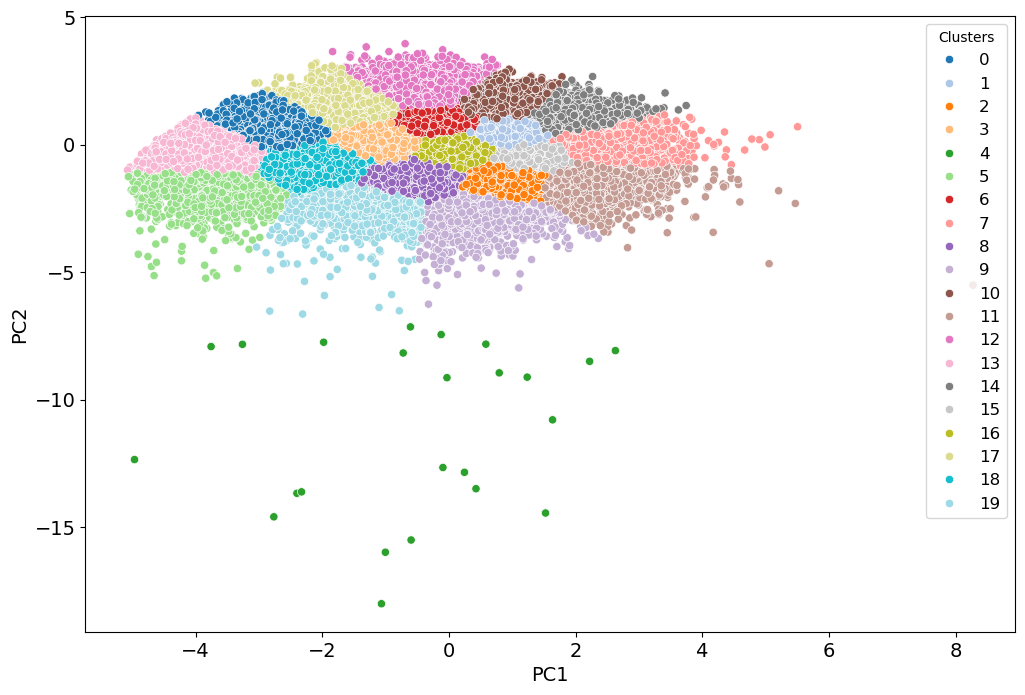

In [55]:
# üìå Graficamos los clusters en el espacio PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=clusters, palette="tab20", alpha=1, legend = True)

# üìå Agregamos etiquetas y t√≠tulo
plt.xlabel("PC1", fontsize = 14)
plt.ylabel("PC2", fontsize = 14)
plt.legend(title="Clusters", fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('clusters_pca.png', dpi=300, bbox_inches='tight')
plt.show()


In [56]:
# üìå Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# üìå Calcular la distancia de cada punto a su centroide correspondiente
distances = cdist(X_pca, centroids, metric="euclidean")

# üìå Encontrar los 10 puntos m√°s cercanos a cada centroide
closest_indices = np.argsort(distances, axis=0)[:10, :]  # Seleccionamos los 10 m√°s cercanos

# üìå Asociar cada √≠ndice con su g√©nero correspondiente
cluster_top_genres = {}

for cluster in range(kmeans.n_clusters):
    top_genres = df_single_genre.iloc[closest_indices[:, cluster]]["track_genre"].astype(str).tolist()
    cluster_top_genres[cluster] = top_genres  # Aseguramos que sean strings

# üìå Mostrar los resultados
print("üìä Top 10 G√©neros m√°s cercanos a cada centroide:")
for cluster, genres in cluster_top_genres.items():
    print(f"Cluster {cluster}: {', '.join(genres)}")


üìä Top 10 G√©neros m√°s cercanos a cada centroide:
Cluster 0: ska, rock, rock, electronic, classical, rock, metal, electronic, chill_sleep, metal
Cluster 1: soundtrack, electronic, classical, soundtrack, electronic, romance, metal, classical, world, rock
Cluster 2: rock, folk_songwriter, electronic, rock, industrial, funk_disco, latin, world, latin, instrumental
Cluster 3: classical, metal, electronic, classical, rock, chill_sleep, pop, pop, latin, rock
Cluster 4: electronic, metal, electronic, alternative, electronic, world, rock, world, electronic, electronic
Cluster 5: classical, electronic, alternative, comedy, latin, soundtrack, metal, rock, children, electronic
Cluster 6: world, metal, dancehall, funk_disco, folk_songwriter, pop, dub, pop, latin, electronic
Cluster 7: world, latin, world, latin, latin, world, soundtrack, rock, electronic, industrial
Cluster 8: classical, latin, country, electronic, pop, electronic, latin, rock, dancehall, electronic
Cluster 9: electronic, world

# Resoluci√≥n del problema multietiqueta

In [57]:
df = pd.read_csv('./dataset.csv')

In [58]:
# Juntamos cada track_id con sus g√©neros
df_genre = df.groupby(['track_id', 'track_name'])['track_genre'].apply(lambda x: tuple(set(x))).reset_index().\
    merge(df, on='track_id', how='left').drop_duplicates(subset='track_id').\
    drop(columns=['track_genre_y', 'track_name_y']).rename(columns={'track_name_x': 'track_name', 'track_genre_x': 'track_genre'})

In [59]:
# Diccionario de agrupaci√≥n manual
genre_mapping = {
    # üé∏ Rock y derivados
    "hard-rock": "rock",
    "rock": "rock",
    "rock-n-roll": "rock",
    "alt-rock": "rock",
    "garage": "rock",
    "grunge": "rock",
    "psych-rock": "rock",
    "punk-rock": "rock",
    "punk": "rock",
    "hardcore": "rock",
    "indie-rock": "rock",
    
    # ü§ò Metal y variantes
    "heavy-metal": "metal",
    "black-metal": "metal",
    "death-metal": "metal",
    "metal": "metal",
    "metalcore": "metal",
    "grindcore": "metal",
    "groove": "metal",
    
    # üéß Electr√≥nica y variantes
    "edm": "electronic",
    "electro": "electronic",
    "electronic": "electronic",
    "synth-pop": "electronic",
    "dubstep": "electronic",
    "techno": "electronic",
    "minimal-techno": "electronic",
    "detroit-techno": "electronic",
    "house": "electronic",
    "deep-house": "electronic",
    "progressive-house": "electronic",
    "trance": "electronic",
    "drum-and-bass": "electronic",
    "idm": "electronic",
    "breakbeat": "electronic",
    "club": "electronic",
    
    # üé§ Hip-Hop / R&B
    "hip-hop": "hip-hop_rnb",
    "r-n-b": "hip-hop_rnb",
    
    # üéº Pop y variantes
    "pop": "pop",
    "indie-pop": "pop",
    "british": "pop",
    "power-pop": "pop",
    "mandopop": "pop",
    "cantopop": "pop",
    "j-pop": "pop",
    "k-pop": "pop",
    
    # üåé M√∫sica Latina y Tropical
    "latin": "latin",
    "latino": "latin",
    "brazil": "latin",
    "mpb": "latin",
    "pagode": "latin",
    "samba": "latin",
    "forro": "latin",
    "sertanejo": "latin",
    "tango": "latin",
    "salsa": "latin",
    "reggaeton": "latin",
    
    # üé∂ M√∫sica cl√°sica y ambiental
    "classical": "classical",
    "piano": "classical",
    "opera": "classical",
    "ambient": "classical",
    
    # üé∑ Jazz, Soul, Blues
    "jazz": "jazz_soul",
    "soul": "jazz_soul",
    "blues": "jazz_soul",
    
    # üé∂ Folk y cantautores
    "folk": "folk_songwriter",
    "songwriter": "folk_songwriter",
    "singer-songwriter": "folk_songwriter",
    
    # üéµ M√∫sica alternativa y experimental
    "alternative": "alternative",
    "indie": "alternative",
    "emo": "alternative",
    "goth": "alternative",
    
    # üè† M√∫sica de hogar y relajaci√≥n
    "chill": "chill_sleep",
    "sleep": "chill_sleep",
    "study": "chill_sleep",
    
    # üé≠ Bandas sonoras y m√∫sica de cine
    "disney": "soundtrack",
    "pop-film": "soundtrack",
    "show-tunes": "soundtrack",
    
    # üï∫ Funk, Disco y Groove
    "funk": "funk_disco",
    "disco": "funk_disco",
    "groove": "funk_disco",
    
    # üéπ M√∫sica instrumental y guitarra
    "acoustic": "instrumental",
    "guitar": "instrumental",
    
    # üåç M√∫sica del mundo
    "world-music": "world",
    "turkish": "world",
    "iranian": "world",
    "afrobeat": "world",
    "indian": "world",
    "malay": "world",
    "gospel": "world",
    
    # üé° M√∫sica infantil
    "children": "children",
    "kids": "children",
    
    # üéµ Otros g√©neros
    "comedy": "comedy",
    "party": "party",
    "happy": "party",
    "honky-tonk": "country",
    "country": "country",
    "industrial": "industrial",
    "new-age": "new-age",
    "dub": "dub",
    "dance": "dancehall",
    "dancehall": "dancehall",
    "ska": "ska",
    "trip-hop": "trip-hop",
    "romance": "romance",
    "sad": "romance",
    
    # Incluidos en version 2
    "anime": "soundtrack",  # M√∫sica relacionada con anime, similar a bandas sonoras
    "bluegrass": "folk_songwriter",  # Subg√©nero del folk con ra√≠ces en EE.UU.
    "chicago-house": "electronic",  # Subg√©nero del house, dentro de electr√≥nica
    "french": "world",  # M√∫sica francesa, dentro de m√∫sica del mundo
    "german": "world",  # M√∫sica alemana, dentro de m√∫sica del mundo
    "hardstyle": "electronic",  # Subg√©nero de electr√≥nica, similar a techno y trance
    "j-dance": "pop",  # Subg√©nero japon√©s relacionado con pop y dance
    "j-idol": "pop",  # M√∫sica idol japonesa, en pop
    "j-rock": "rock",  # Rock japon√©s, dentro de rock
    "reggae": "world",  # Reggae dentro de m√∫sica del mundo
    "rockabilly": "rock",  # Subg√©nero de rock & roll
    "spanish": "world",  # M√∫sica en espa√±ol dentro de m√∫sica del mundo
    "swedish": "world",  # M√∫sica sueca dentro de m√∫sica del mundo
    
}

df_multigenre = df_genre.copy()
# Funci√≥n para mapear cada g√©nero dentro de la lista
def map_genres(genre_list):
    if isinstance(genre_list, (list, tuple)):  # Si es una lista o tupla
        return [genre_mapping.get(genre, genre) for genre in genre_list]  # Mapea cada elemento
    return genre_mapping.get(genre_list, genre_list)  # Si es un string, mapear directamente

# Aplicar la funci√≥n a la columna
df_multigenre["track_genre"] = df_multigenre["track_genre"].apply(map_genres)


In [60]:
# De todas las listas que tenemos del g√©nero de las canciones vamos a ver cu√°ntas listas iguales hay en todo el DataFrame.
# Para ello vamos a convertir todas las listas en tuplas, ya que estos s√≠ son elementos hashables 
# y las vamos a ordenar para que se detecten como iguales las tuplas (a,b) y (b,a)
df_multigenre['track_genre_tuple'] = df_multigenre['track_genre'].apply(lambda x: tuple(sorted(x)))
tuplas_generos = df_multigenre.groupby('track_genre_tuple').count()
# Ahora vamos a aplicar un umbral de apariciones m√≠nimo para que no se tengan en cuenta las tuplas que aparezcan menos de n_min_tuple veces
n_min_tuple = 5
tuplas_generos = tuplas_generos[tuplas_generos['track_id'] < n_min_tuple].index.to_list()

df_reduced = df_multigenre[~df_multigenre['track_genre_tuple'].isin(tuplas_generos)] # Eliminamos las tuplas con menos de n_min_tuple apariciones

In [61]:
# Vamos a eliminar ahora todas las listas de g√©neros que tengan m√°s de n_max_genre elementos para simplificar el problema
n_max_genre = 3
df_reduced = df_reduced[df_reduced['track_genre'].apply(lambda x: len(x) <= n_max_genre)].reset_index(drop=True)

In [62]:
df_series =df_reduced.track_genre.value_counts()
df_series

track_genre
[electronic]                  11934
[world]                        9036
[pop]                          6677
[latin]                        6150
[rock]                         5627
                              ...  
[latin, rock, alternative]        1
[alternative, metal]              1
[pop, latin]                      1
[pop, world, electronic]          1
[alternative, pop]                1
Name: count, Length: 323, dtype: int64

In [63]:
# Balanceamos las clases para que haya un m√°ximo de 50 canciones por cada combinaci√≥n de g√©neros
df_reduced = df_reduced.groupby('track_genre_tuple', group_keys=False).apply(lambda x: x.sample(min(len(x), n_min_tuple)))

/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3943647684.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduced = df_reduced.groupby('track_genre_tuple', group_keys=False).apply(lambda x: x.sample(min(len(x), n_min_tuple)))


In [64]:
# Una vez reducido el DataFrame vamos a contar las apariciones de cada g√©nero
pd.Series(list((genre for sublist in df_reduced['track_genre'] for genre in sublist))).value_counts() 

rock               345
pop                205
electronic         200
alternative        190
latin              185
world              185
jazz_soul          165
folk_songwriter    165
funk_disco         145
metal              140
classical          115
hip-hop_rnb        110
dancehall           70
soundtrack          60
instrumental        55
chill_sleep         50
party               45
ska                 40
dub                 35
industrial          35
country             30
romance             25
children            25
trip-hop            20
new-age             15
comedy               5
Name: count, dtype: int64

## Transformaci√≥n a formato multi-label

Para poder entrenar un modelo supervisado, debemos convertir la lista de g√©neros de cada canci√≥n en vectores binarios (0/1) que indiquen la presencia o ausencia de cada g√©nero.

In [65]:
mlb = MultiLabelBinarizer()
# y ser√° un array de forma (n_muestras, n_generos)
y = mlb.fit_transform(df_reduced['track_genre'])
print("Dimensiones de y:", y.shape)


Dimensiones de y: (1155, 26)


## Selecci√≥n de variables predictoras

In [66]:
# One-hot encoding de la variable time_signature, solo nos vamos a quedar con 3 y 4 porque son los m√°s significantes
df_reduced = pd.concat([df_reduced, pd.get_dummies(df_reduced['time_signature'])], axis=1) 

In [67]:
df_reduced.rename(columns={3: 'time_signature_3', 4: 'time_signature_4'}, inplace=True)

In [68]:
features = [
    'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'time_signature_3', 'time_signature_4', 'mode'
]

X = df_reduced[features].copy()

# Opcional: llenar posibles nulos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # o la estrategia que estimes
X = imputer.fit_transform(X)

# Escalado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Divisi√≥n train-test

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)


## Red Neuronal

In [ ]:
# ------------------------------------------------------------------
# 1. Definici√≥n de la red neuronal Keras
# ------------------------------------------------------------------
# - Capa de salida con dimensi√≥n igual al n√∫mero de g√©neros
# - Activaci√≥n 'sigmoid' en la salida
# - P√©rdida: 'binary_crossentropy'

n_features = X_train.shape[1]
n_labels = y_train.shape[1]

model = models.Sequential()
model.add(layers.Input(shape=(n_features,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# Capa de salida con neuronas = n√∫mero de etiquetas y activaci√≥n sigmoide
model.add(layers.Dense(n_labels, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']  # En multi-label, la 'accuracy' puede no ser tan representativa
)

model.summary()

# ------------------------------------------------------------------
# 2. Entrenamiento
# ------------------------------------------------------------------
history = model.fit(
    X_train, 
    y_train, 
    epochs=20,         # Ajusta seg√∫n tu criterio, por ejemplo 20 o 50
    batch_size=32,     # Ajusta si deseas
    validation_data=(X_test, y_test),
    verbose=1
)

# ------------------------------------------------------------------
# 3. Evaluaci√≥n con m√©tricas cl√°sicas (f1, precision, recall)
# ------------------------------------------------------------------
# La m√©trica de 'accuracy' en el entrenamiento es un promedio
# de aciertos a nivel individual (dependiendo la versi√≥n de TF).
# Para un an√°lisis m√°s detallado, calculamos F1, precision, recall
# en scikit-learn, generando predicciones con un umbral 0.5.

y_pred_proba = model.predict(X_test)
# Binarizamos con umbral 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Classification report (por etiqueta):")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# Si prefieres f1 'micro' o 'macro':
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 64)             ‚îÇ           704 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 26)             ‚îÇ           858 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,642 (14.23 KB)

 Trainable params: 3,642 (14.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.0430 - loss: 0.7038 - val_accuracy: 0.0216 - val_loss: 0.5914
Epoch 2/20
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.0343 - loss: 0.5459 - val_accuracy: 0.0260 - val_loss: 0.3926
Epoch 3/20
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.0375 - loss: 0.3489 - val_accuracy: 0.0563 - val_loss: 0.2821
Epoch 4/20
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.0469 - loss: 0.2706 - val_accuracy: 0.0346 - val_loss: 0.2608
Epoch 5/20
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.0494 - loss: 0.2510 - val_accuracy: 0.0779 - val_loss: 0.2537
Epoch 6/20
29/29 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.0850 - loss: 0.2449 - val_accuracy: 0.0996 - val_loss: 0.2500
Epoc

/Users/octa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/octa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/octa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/octa/anaco

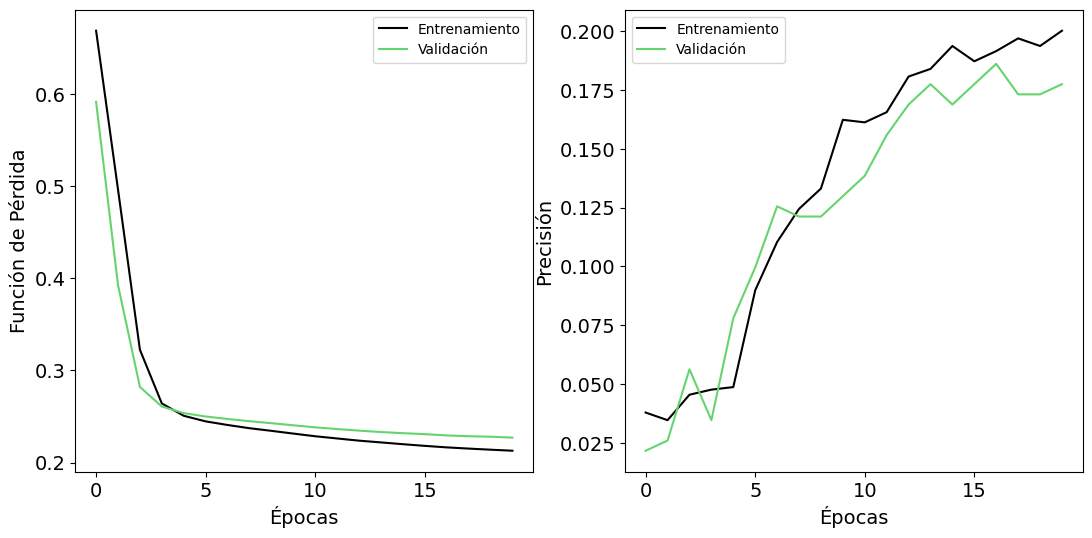

In [75]:
# Crear una figura con dos subgr√°ficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
# Gr√°fico de la funci√≥n de p√©rdida
axes[0].plot(history.history['loss'], label='Entrenamiento', color='black')
axes[0].plot(history.history['val_loss'], label='Validaci√≥n', color=(101/255, 212/255, 110/255))
axes[0].set_xlabel('√âpocas', fontsize=14)
axes[0].set_ylabel('Funci√≥n de P√©rdida', fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].legend()

# Gr√°fico de la precisi√≥n
axes[1].plot(history.history['accuracy'], label='Entrenamiento', color='black')
axes[1].plot(history.history['val_accuracy'], label='Validaci√≥n', color=(101/255, 212/255, 110/255))
axes[1].set_xlabel('√âpocas', fontsize=14)
axes[1].set_ylabel('Precisi√≥n', fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].legend()

# Guardar las im√°genes
plt.savefig('training_evolution.png', dpi=300, bbox_inches='tight')
plt.show()


In [76]:
# üìå Obtener el reporte de clasificaci√≥n como diccionario en formato multietiqueta
report_dict = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True, zero_division=0)

# üìå Convertir el diccionario en DataFrame
df_report = pd.DataFrame(report_dict).transpose()

# üìå Guardar en un archivo Excel
df_report.to_excel('classification_report_multietiqueta.xlsx')

print("‚úÖ Reporte de clasificaci√≥n guardado como 'classification_report_multietiqueta.xlsx'")


‚úÖ Reporte de clasificaci√≥n guardado como 'classification_report_multietiqueta.xlsx'


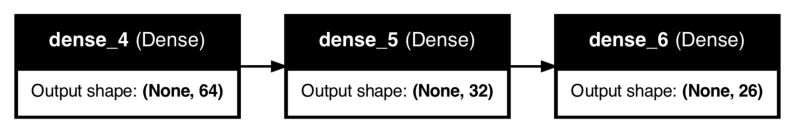

In [77]:
# Guardar el esquema de la red neuronal en un archivo
plot_model(model, to_file="model_architecture_multietiqueta.png", show_shapes=True, show_layer_names=True, rankdir="LR")

# Mostrar la imagen generada
img = PIL.Image.open("model_architecture_multietiqueta.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


## Resoluci√≥n del problema One vs the Rest

In [78]:
df = pd.read_csv('./dataset.csv')

# Quitar columnas innecesarias
df.drop(columns = ['Unnamed: 0'], inplace=True)
# Comprobar los valores de time_signature
df['time_signature'].value_counts()
# Quitar los valores que tienen 0 de time_signature
df = df[df['time_signature'] != 0]
# Quitar las canciones con duraci√≥n 0
df = df[df['duration_ms'] > 0]
df.describe().transpose()

def convertir_a_decibelios(sonido):
    return 10**(-12) * 10**((sonido)/10)

df['loudness'] = df['loudness'].apply(convertir_a_decibelios)

# Vamos a cambiar todos los g√©neros por los de genre_mapping, y tener repetidos los track_id
df["track_genre"] = df["track_genre"].map(genre_mapping)
df.track_genre.dropna(inplace=True)
df.track_genre.unique()

array(['instrumental', 'world', 'rock', 'alternative', 'classical',
       'soundtrack', 'metal', 'folk_songwriter', 'jazz_soul', 'latin',
       'electronic', 'pop', 'children', 'chill_sleep', 'comedy',
       'country', 'dancehall', 'funk_disco', 'dub', 'party',
       'hip-hop_rnb', 'industrial', 'new-age', 'romance', 'ska',
       'trip-hop'], dtype=object)

<Axes: xlabel='track_genre'>

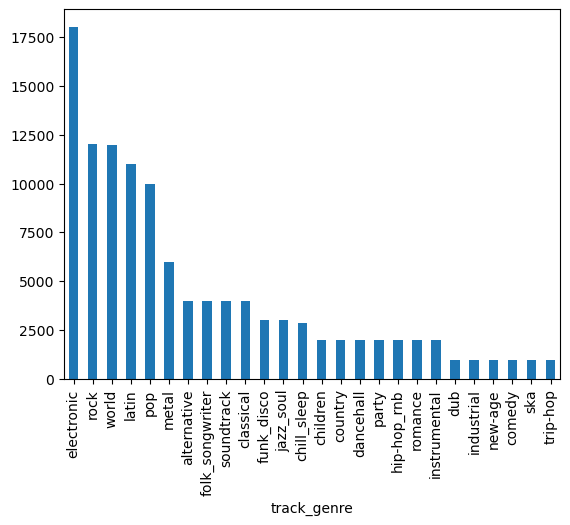

In [79]:
df.track_genre.value_counts().plot(kind = 'bar')

In [85]:
# Encontrar el n√∫mero m√≠nimo de muestras disponibles en cualquier g√©nero
min_value = df['track_genre'].value_counts().min()
print(min_value)

# Crear un DataFrame balanceado con la misma cantidad de ejemplos por clase
df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)

# Obtener los g√©neros √∫nicos
unique_genres = df_balanced['track_genre'].unique()

# Diccionario para guardar modelos
models = {}

# Filtrar solo las columnas num√©ricas
features = [
'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 
'valence', 'tempo', 'popularity', 'mode'
]

for genre in unique_genres:
    print(f"\nEntrenando clasificador para: {genre}")
    
    df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)

    # Crear etiqueta binaria: 0 si es el g√©nero, 1 si no lo es
    df_balanced[f'label_{genre}'] = (df_balanced['track_genre'] != genre).astype(int)
    print(df_balanced[f'label_{genre}'].value_counts())

    # Si una canci√≥n es multig√©nero, para entrenar la eliminamos de los g√©neros que no estamos prediciendo
    df_balanced = df_balanced.sort_values(by=f'label_{genre}', ascending=True)  # Ordenamos para que genre (0) quede primero
    df_balanced = df_balanced.drop_duplicates(subset=['track_id'], keep='first')  # Mantiene solo la primera (genre)

    # Ahora vamos a balancear las clases 0 y 1 para entrenar los modelos
    # Separar en dos grupos
    df_majority = df_balanced[df_balanced[f'label_{genre}'] == 1]  # No genre
    df_minority = df_balanced[df_balanced[f'label_{genre}'] == 0]  # Genre

    # Reducir el grupo mayoritario al tama√±o del minoritario
    df_majority_downsampled = resample(df_majority, 
                                    replace=False,  # No reemplazo
                                    n_samples=len(df_minority),  # Igualar al minoritario
                                    random_state=42)  # Reproducibilidad

    # Unir los dos grupos
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    # Verificar el balance
    print('\n')
    print(df_balanced[f'label_{genre}'].value_counts())


    X = df_balanced[features].copy()
    y = df_balanced[f'label_{genre}']

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Entrenar modelo
    model = RandomForestClassifier(random_state=42, class_weight="balanced")
    model.fit(X_train, y_train)

    # Evaluar modelo
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Accuracy for {genre}: {acc:.4f}")
    print(f"Precision for {genre}: {precision:.4f}")
    print(f"Recall for {genre}: {recall:.4f}")

    matriz_confusion = confusion_matrix(y_test, y_pred)
    print(f"\n Matriz de confusi√≥n para {genre}:")
    print(matriz_confusion)

    # Guardar modelo
    models[genre] = model


1000

Entrenando clasificador para: alternative
label_alternative
1    25000
0     1000
Name: count, dtype: int64


label_alternative
1    998
0    998
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)
/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genr

Accuracy for alternative: 0.6925
Precision for alternative: 0.6882
Recall for alternative: 0.6632

 Matriz de confusi√≥n para alternative:
[[149  58]
 [ 65 128]]

Entrenando clasificador para: children
label_children
1    25000
0     1000
Name: count, dtype: int64


label_children
1    996
0    996
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for children: 0.8195
Precision for children: 0.7905
Recall for children: 0.8557

 Matriz de confusi√≥n para children:
[[161  44]
 [ 28 166]]

Entrenando clasificador para: chill_sleep
label_chill_sleep
1    25000
0     1000
Name: count, dtype: int64


label_chill_sleep
1    1000
0    1000
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for chill_sleep: 0.8275
Precision for chill_sleep: 0.8218
Recall for chill_sleep: 0.8342

 Matriz de confusi√≥n para chill_sleep:
[[165  36]
 [ 33 166]]

Entrenando clasificador para: classical
label_classical
1    25000
0     1000
Name: count, dtype: int64


label_classical
1    987
0    987
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for classical: 0.8203
Precision for classical: 0.8098
Recall for classical: 0.8384

 Matriz de confusi√≥n para classical:
[[158  39]
 [ 32 166]]

Entrenando clasificador para: comedy
label_comedy
1    25000
0     1000
Name: count, dtype: int64


label_comedy
1    996
0    996
Name: count, dtype: int64
Accuracy for comedy: 0.9148
Precision for comedy: 0.8922
Recall for comedy: 0.9381

 Matriz de confusi√≥n para comedy:
[[183  22]
 [ 12 182]]

Entrenando clasificador para: country


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)
/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_gen

label_country
1    25000
0     1000
Name: count, dtype: int64


label_country
1    997
0    997
Name: count, dtype: int64
Accuracy for country: 0.8571
Precision for country: 0.8366
Recall for country: 0.8756

 Matriz de confusi√≥n para country:
[[173  33]
 [ 24 169]]

Entrenando clasificador para: dancehall
label_dancehall
1    25000
0     1000
Name: count, dtype: int64


label_dancehall
1    972
0    972
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for dancehall: 0.8329
Precision for dancehall: 0.8706
Recall for dancehall: 0.7749

 Matriz de confusi√≥n para dancehall:
[[176  22]
 [ 43 148]]

Entrenando clasificador para: dub
label_dub
1    25000
0     1000
Name: count, dtype: int64


label_dub
1    999
0    999
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for dub: 0.8375
Precision for dub: 0.8413
Recall for dub: 0.8454

 Matriz de confusi√≥n para dub:
[[160  33]
 [ 32 175]]

Entrenando clasificador para: electronic
label_electronic
1    25000
0     1000
Name: count, dtype: int64


label_electronic
1    994
0    994
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for electronic: 0.7588
Precision for electronic: 0.7402
Recall for electronic: 0.7784

 Matriz de confusi√≥n para electronic:
[[151  53]
 [ 43 151]]

Entrenando clasificador para: folk_songwriter
label_folk_songwriter
1    25000
0     1000
Name: count, dtype: int64


label_folk_songwriter
1    920
0    920
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for folk_songwriter: 0.8016
Precision for folk_songwriter: 0.8065
Recall for folk_songwriter: 0.8021

 Matriz de confusi√≥n para folk_songwriter:
[[145  36]
 [ 37 150]]

Entrenando clasificador para: funk_disco
label_funk_disco
1    25000
0     1000
Name: count, dtype: int64


label_funk_disco
1    994
0    994
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for funk_disco: 0.7387
Precision for funk_disco: 0.7320
Recall for funk_disco: 0.7320

 Matriz de confusi√≥n para funk_disco:
[[152  52]
 [ 52 142]]

Entrenando clasificador para: hip-hop_rnb
label_hip-hop_rnb
1    25000
0     1000
Name: count, dtype: int64


label_hip-hop_rnb
1    997
0    997
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for hip-hop_rnb: 0.8471
Precision for hip-hop_rnb: 0.8626
Recall for hip-hop_rnb: 0.8135

 Matriz de confusi√≥n para hip-hop_rnb:
[[181  25]
 [ 36 157]]

Entrenando clasificador para: industrial
label_industrial
1    25000
0     1000
Name: count, dtype: int64


label_industrial
1    1000
0    1000
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for industrial: 0.8475
Precision for industrial: 0.8416
Recall for industrial: 0.8543

 Matriz de confusi√≥n para industrial:
[[169  32]
 [ 29 170]]

Entrenando clasificador para: instrumental
label_instrumental
1    25000
0     1000
Name: count, dtype: int64


label_instrumental
1    993
0    993
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for instrumental: 0.7789
Precision for instrumental: 0.7593
Recall for instrumental: 0.8200

 Matriz de confusi√≥n para instrumental:
[[146  52]
 [ 36 164]]

Entrenando clasificador para: jazz_soul
label_jazz_soul
1    25000
0     1000
Name: count, dtype: int64


label_jazz_soul
1    974
0    974
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for jazz_soul: 0.7641
Precision for jazz_soul: 0.7429
Recall for jazz_soul: 0.8041

 Matriz de confusi√≥n para jazz_soul:
[[142  54]
 [ 38 156]]

Entrenando clasificador para: latin
label_latin
1    25000
0     1000
Name: count, dtype: int64


label_latin
1    974
0    974
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for latin: 0.7897
Precision for latin: 0.7692
Recall for latin: 0.8247

 Matriz de confusi√≥n para latin:
[[148  48]
 [ 34 160]]

Entrenando clasificador para: metal
label_metal
1    25000
0     1000
Name: count, dtype: int64


label_metal
1    989
0    989
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for metal: 0.9040
Precision for metal: 0.8916
Recall for metal: 0.9188

 Matriz de confusi√≥n para metal:
[[177  22]
 [ 16 181]]

Entrenando clasificador para: new-age
label_new-age
1    25000
0     1000
Name: count, dtype: int64


label_new-age
1    994
0    994
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for new-age: 0.9196
Precision for new-age: 0.9309
Recall for new-age: 0.9021

 Matriz de confusi√≥n para new-age:
[[191  13]
 [ 19 175]]

Entrenando clasificador para: party
label_party
1    25000
0     1000
Name: count, dtype: int64


label_party
1    1000
0    1000
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for party: 0.8675
Precision for party: 0.8614
Recall for party: 0.8744

 Matriz de confusi√≥n para party:
[[173  28]
 [ 25 174]]

Entrenando clasificador para: pop
label_pop
1    25000
0     1000
Name: count, dtype: int64


label_pop
1    1000
0    1000
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for pop: 0.6550
Precision for pop: 0.6432
Recall for pop: 0.6884

 Matriz de confusi√≥n para pop:
[[125  76]
 [ 62 137]]

Entrenando clasificador para: rock
label_rock
1    25000
0     1000
Name: count, dtype: int64


label_rock
1    983
0    983
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for rock: 0.6853
Precision for rock: 0.6786
Recall for rock: 0.6856

 Matriz de confusi√≥n para rock:
[[137  63]
 [ 61 133]]

Entrenando clasificador para: romance
label_romance
1    25000
0     1000
Name: count, dtype: int64


label_romance
1    966
0    966
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for romance: 0.8656
Precision for romance: 0.8488
Recall for romance: 0.8923

 Matriz de confusi√≥n para romance:
[[161  31]
 [ 21 174]]

Entrenando clasificador para: ska
label_ska
1    25000
0     1000
Name: count, dtype: int64


label_ska
1    1000
0    1000
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for ska: 0.9100
Precision for ska: 0.9055
Recall for ska: 0.9146

 Matriz de confusi√≥n para ska:
[[182  19]
 [ 17 182]]

Entrenando clasificador para: soundtrack
label_soundtrack
1    25000
0     1000
Name: count, dtype: int64


label_soundtrack
1    997
0    997
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for soundtrack: 0.7644
Precision for soundtrack: 0.7929
Recall for soundtrack: 0.6943

 Matriz de confusi√≥n para soundtrack:
[[171  35]
 [ 59 134]]

Entrenando clasificador para: trip-hop
label_trip-hop
1    25000
0     1000
Name: count, dtype: int64


label_trip-hop
1    997
0    997
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for trip-hop: 0.8471
Precision for trip-hop: 0.8367
Recall for trip-hop: 0.8497

 Matriz de confusi√≥n para trip-hop:
[[174  32]
 [ 29 164]]

Entrenando clasificador para: world
label_world
1    25000
0     1000
Name: count, dtype: int64


label_world
1    997
0    997
Name: count, dtype: int64


/var/folders/wy/t0vzzgmd2b94w25qyllnrx0m0000gn/T/ipykernel_33525/3858934541.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('track_genre').apply(lambda x: x.sample(min_value, random_state=42)).reset_index(drop=True)


Accuracy for world: 0.6642
Precision for world: 0.6595
Recall for world: 0.6321

 Matriz de confusi√≥n para world:
[[143  63]
 [ 71 122]]


In [86]:
models.items()

dict_items([('alternative', RandomForestClassifier(class_weight='balanced', random_state=42)), ('children', RandomForestClassifier(class_weight='balanced', random_state=42)), ('chill_sleep', RandomForestClassifier(class_weight='balanced', random_state=42)), ('classical', RandomForestClassifier(class_weight='balanced', random_state=42)), ('comedy', RandomForestClassifier(class_weight='balanced', random_state=42)), ('country', RandomForestClassifier(class_weight='balanced', random_state=42)), ('dancehall', RandomForestClassifier(class_weight='balanced', random_state=42)), ('dub', RandomForestClassifier(class_weight='balanced', random_state=42)), ('electronic', RandomForestClassifier(class_weight='balanced', random_state=42)), ('folk_songwriter', RandomForestClassifier(class_weight='balanced', random_state=42)), ('funk_disco', RandomForestClassifier(class_weight='balanced', random_state=42)), ('hip-hop_rnb', RandomForestClassifier(class_weight='balanced', random_state=42)), ('industrial',

In [87]:
# Iterar sobre cada modelo entrenado
prob_df = pd.DataFrame()
X = df[features].copy()
for genre, model in models.items():
    prob_df[genre] = model.predict_proba(X)[:, 1]  # Probabilidad de ser del g√©nero

In [88]:
# Vamos a hacer un join con el DataFrame original
df_join = df.join(prob_df)
df_join

# Vamos a exportar los resultados a un excel
df_join.to_excel('predicciones_generos.xlsx', index=False)

In [89]:
X = df[features].copy()
prob_df = pd.DataFrame()
for genre, model in models.items():
    prob_df[genre] = model.predict_proba(X)[:, 1]  # Probabilidad de ser del g√©nero
    

In [90]:
df_multigenre

track_id  \
0       0000vdREvCVMxbQTkS888c   
1       000CC8EParg64OmTxVnZ0p   
2       000Iz0K615UepwSJ5z2RE5   
3       000RDCYioLteXcutOjeweY   
4       000qpdoc97IMTBvF8gwcpy   
...                        ...   
113994  7zxHiMmVLt4LGWpOMqOpUh   
113995  7zxpdh3EqMq2JCkOI0EqcG   
113996  7zyYmIdjqqiX6kLryb7QBx   
113997  7zybSU9tFO9HNlwmGF7stc   
113998  7zz7iNGIWhmfFE7zlXkMma   

                                               track_name    track_genre  \
0                                                   Lolly        [world]   
1       It's All Coming Back To Me Now (Glee Cast Vers...   [electronic]   
2                           B√∂xig Leise - Pig & Dan Remix   [electronic]   
3                                              Teeje Week  [hip-hop_rnb]   
4                                                    Tief   [electronic]   
...                                                   ...            ...   
113994        Aethu Kari Raavilum - From "Bangalore Days"   [soundtrack]   
113995                         Two Worlds (From "Tarzan")   [soundtrack]   
113996                                             ‰ª•ÂæåÂà•ÂÅöÊúãÂèã          [pop]   
113997                                       Sunset Drive   [electronic]   
113998                                         Grant Hart          [pop]   

        Unnamed: 0                   artists         album_name  popularity  \
0            39463                      Rill              Lolly          44   
1            17586                 Glee Cast    Glee Love Songs          47   
2            73441  Paul Kalkbrenner;Pig&Dan                  X          22   
3            51365             Jordan Sandhu         Teeje Week          62   
4            73649          Paul Kalkbrenner               Zeit          19   
...            ...                       ...                ...         ...   
113994       80856    Haricharan;Gopi Sundar     Bangalore Days          56   
113995       26387               Piano Genie  Disney Favourites          23   
113996       70175                 Eric Chou                Â≠∏ËëóÊÑõ          61   
113997       32730                Stereoclip             Echoes          54   
113998       82357                The Posies   Amazing Disgrace          22   

        duration_ms  explicit  danceability  ...  loudness  mode  speechiness  \
0            160725      True         0.910  ...    -9.844     0       0.1990   
1            322933     False         0.269  ...    -7.361     1       0.0366   
2            515360     False         0.686  ...   -13.264     0       0.0462   
3            190203     False         0.679  ...    -3.537     1       0.1900   
4            331240     False         0.519  ...   -13.606     0       0.0291   
...             ...       ...           ...  ...       ...   ...          ...   
113994       325156     False         0.766  ...   -11.464     0       0.0324   
113995       109573     False         0.529  ...   -32.266     1       0.0587   
113996       260573     False         0.423  ...    -9.458     1       0.0372   
113997       234300     False         0.649  ...   -11.430     0       0.0397   
113998       144973     False         0.263  ...    -6.887     1       0.0897   

        acousticness  instrumentalness  liveness  valence    tempo  \
0           0.075700           0.00301    0.1540    0.432  104.042   
1           0.406000           0.00000    0.1170    0.341  178.174   
2           0.001140           0.18100    0.1110    0.108  119.997   
3           0.058300           0.00000    0.0825    0.839  161.721   
4           0.000964           0.72000    0.0916    0.234  129.971   
...              ...               ...       ...      ...      ...   
113994      0.698000           0.00143    0.1570    0.672  119.992   
113995      0.996000           0.95900    0.0916    0.510   82.694   
113996      0.728000           0.00000    0.1050    0.291  130.576   
113997      0.268000           0.93200    0.0974    0.150  